In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_palette('colorblind')
from matplotlib.pyplot import tight_layout
# ##SETTING PARAMS FOR MATPLOTLIB FIGURES
plt.rcParams.update({"figure.figsize": (6, 6),
                 "axes.facecolor": "white",
                 "axes.edgecolor": "black"})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette('colorblind'))
##set font size
font = {'family': 'sans-serif',
       'weight': 'normal',
       'size': 14}
plt.rc('font', **font)
# ##PANDAS PLOTTING
pd.plotting.register_matplotlib_converters()


### Step 1: save environment file

In [3]:
!conda env export > quasi_poisson_environment.yml

### Step 2: import modules


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# For inline plots in Jupyter
%matplotlib inline
import pandas as pd
import matplotlib as plt
import glob
import os
import xml.etree.ElementTree as ET
from datetime import datetime, timezone
from tqdm import tqdm
import codecs
import csv
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
    

### Step 2 : Import files

In [7]:
data_directory_weather = "/home/paulharford/college/project/project_data/processed/WEATHERED_warnings_2014-2023_cleaned_v4.csv"
data_directory_ihfd = "/home/paulharford/college/project/project_data/processed/WEATHERED_ihfd_clean_v2.csv"
data_directory_census = "/home/paulharford/college/project/project_data/processed/WEATHERED_census_pop_age_grp_gender_region.csv"
full_path_ihfd = os.path.abspath(data_directory_ihfd)
full_path_weather = os.path.abspath(data_directory_weather)
full_path_census = os.path.abspath(data_directory_census)

In [8]:
df_ihfd = pd.read_csv(full_path_ihfd)
df_weather = pd.read_csv(full_path_weather)
df_census = pd.read_csv(full_path_census)

### Step 3: Create full dates range for 2014 to 2023 to merge with datasets, this will be used to provide days where there are no hip fratcure incidents 

In [10]:
##set date range
regions = df_weather['region'].unique()
min_date = df_weather['date'].min()
max_date = df_weather['date'].max()

In [11]:
##set date_time tyope and create date variable
df_weather["Valid From"] = pd.to_datetime(df_weather["Valid From"])
df_weather["date"] = df_weather["Valid From"].dt.date
df_weather["date"] = pd.to_datetime(df_weather["date"])
df_weather["Valid To"] = pd.to_datetime(df_weather["Valid To"])


In [12]:
##create all dates for all years to merge with datasets so we can have days with and without events 
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
multi_index = pd.MultiIndex.from_product([regions, all_dates], names=['region', 'date'])
df_region_date = pd.DataFrame(index=multi_index).reset_index()


In [13]:
##copy full date range for hip and weather data
df_region_date_hip = df_region_date.copy()

In [14]:
df_region_date_weather = df_region_date.copy()

In [15]:
df_region_date_census = df_region_date.copy()

### Step 4: Weather data

In [17]:
df_weather.head(10)

,Issue Time,Valid From,Valid To,Warning Colour,Warning Element,Warning Text,Clare,Cork,Kerry,Limerick,...,warning_severity,weather_type,Duration_hours,date,region,counties_in_region,weather_event_density,county_weight,affected_counties_count,affected_counties_proportion
0,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE Dublin and Midlands,7,1,0.142857,0,0.000000
1,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE Dublin and South East,7,1,0.142857,0,0.000000
2,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE Mid West,3,1,0.333333,0,0.000000
3,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE South West,2,1,0.500000,0,0.000000
4,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE West and North West,6,1,0.166667,0,0.000000
5,2023-11-12 15:00:00+00:00,2023-11-13 03:00:00+00:00,2023-11-13 05:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and early Mond...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE Dublin and North East,5,1,0.200000,0,0.000000
6,2021-12-07 12:05:59+00:00,2021-12-07 12:05:39+00:00,2021-12-07 21:00:00+00:00,Red,Red Wind,Storm Barra: Southwesterly winds later veering...,0,1,1,0,...,Red,Wind warning,8.905833,2021-12-07,HSE South West,2,1,0.500000,2,1.000000
7,2017-10-16 16:02:38+00:00,2017-10-16 16:00:00+00:00,2017-10-17 01:00:00+00:00,Red,Wind,"Latest UpdateStorm Ophelia (Ex hurricane), sit...",1,1,1,1,...,Red,Wind warning,9.000000,2017-10-16,HSE Dublin and North East,5,1,0.200000,5,1.000000
8,2015-01-14 14:00:00+00:00,2015-01-14 21:00:00+00:00,2015-01-15 12:00:00+00:00,Red,Wind,Wind gusts 130 to 150km/h possible.High onshor...,1,0,1,1,...,Red,Wind warning,15.000000,2015-01-14,HSE West and North West,6,1,0.166667,3,0.500000
9,2015-01-14 14:00:00+00:00,2015-01-14 21:00:00+00:00,2015-01-15 12:00:00+00:00,Red,Wind,Wind gusts 130 to 150km/h possible.High onshor...,1,0,1,1,...,Red,Wind warning,15.000000,2015-01-14,HSE Mid West,3,1,0.333333,2,0.666667


### Step 4.1: Map weather severtiy to numeric value and aggregate weather data

In [19]:
##create a numerical mapping of the weather severity
severity_mapping = {
    'Yellow': 1,
    'Orange': 2,
    'Red': 3
}

df_weather['warning_severity_numeric'] = df_weather['warning_severity'].map(severity_mapping)

In [20]:
def aggregate_weather_data(df_weather, keep_columns=None):
    """
    Aggregate weather data by region, date, weather_type, and warning_severity while
    preserving specified additional columns.
    
    Args:
        df_weather: DataFrame containing weather data
        keep_columns: List of additional columns to preserve (beyond the groupby columns)
        
    Returns:
        Aggregated DataFrame with one row per unique region-date-weather_type-warning_severity combination
    """
    # Define default columns to keep if none provided
    if keep_columns is None:
        keep_columns = [
            'counties_in_region', 	
            'county_weight'	
         ]
    
    # Define all columns to group by
    group_cols = ['region', 'date', 'warning_phenomenon', 'warning_severity']
    
    # Define aggregation functions for numeric and other columns
    agg_dict = {
        'warning_severity_numeric': 'max'
    }
    
    # Add aggregation functions 
    for col in keep_columns:
        if col in df_weather.columns:
            # For string columns, take the first value 
            if df_weather[col].dtype == 'object':
                agg_dict[col] = 'first'
            # For boolean or integer flags (like has_multiple_events, warning_upgraded)
            elif df_weather[col].dtype in ['bool', 'int64', 'int32']:
                agg_dict[col] = 'max'
            # For numeric columns, take the max
            elif pd.api.types.is_numeric_dtype(df_weather[col]):
                agg_dict[col] = 'max'
            # For datetime columns
            elif pd.api.types.is_datetime64_dtype(df_weather[col]):
                agg_dict[col] = 'max'
            # Default to first value for any other types
            else:
                agg_dict[col] = 'first'
    
    # Group by the specified columns and aggregate
    weather_agg = df_weather.groupby(group_cols, as_index=False).agg(agg_dict)
    
    # Add the weather flag column to indicate there was an adverse wetaher event on that date 
    weather_agg['weather_event'] = 1
    
    return weather_agg

In [21]:
weather_agg = aggregate_weather_data(df_weather)

In [22]:
weather_agg.head()

,region,date,warning_phenomenon,warning_severity,warning_severity_numeric,counties_in_region,county_weight,weather_event
0,HSE Dublin and Midlands,2014-01-02,Wind,Yellow,1,7,0.142857,1
1,HSE Dublin and Midlands,2014-01-03,Wind,Yellow,1,7,0.142857,1
2,HSE Dublin and Midlands,2014-01-04,Snow_Ice,Yellow,1,7,0.142857,1
3,HSE Dublin and Midlands,2014-01-05,Wind,Yellow,1,7,0.142857,1
4,HSE Dublin and Midlands,2014-01-06,Wind,Orange,2,7,0.142857,1


### Step 4.2: Merge aggregated weather data with all date ranges so we have alldates with or without adverse weather events. 

In [24]:
df_weather_final = pd.merge(
    df_region_date_weather,    # adf has all dates for all regions 
    weather_agg,               
    on=['region', 'date'],    
    how='left'                # left-join so we keep all rows from date df and the weather data gets added 
)


### Step 4.3: Resolve any missing values after merge and aggregation steps

In [26]:
##after joining weather data to full date range there and NaN values, which is expected as not all days have weather events
df_weather_final['warning_severity_numeric'] = df_weather_final['warning_severity_numeric'].fillna(0)

In [27]:
df_weather_final['warning_phenomenon'] = df_weather_final['warning_phenomenon'].fillna('no_weather_type')

In [28]:
df_weather_final['warning_severity'] = df_weather_final['warning_severity'].fillna('no_weather_severity')

### Step 4.4: Add county count and county weight as not all regions have the same number of counties.

In [30]:
# Define your HSE region mapping.
hse_regions = {
    'HSE Dublin and North East': ['Cavan', 'Monaghan', 'Louth', 'Meath', 'Dublin'],
    'HSE Dublin and Midlands': ['Kildare', 'Wicklow', 'Laois', 'Offaly', 'Longford', 'Westmeath', 'Dublin'],
    'HSE Dublin and South East': ['Carlow', 'Kilkenny', 'Tipperary', 'Waterford', 'Wexford', 'Wicklow', 'Dublin'],
    'HSE Mid West': ['Clare', 'Limerick', 'Tipperary'],
    'HSE South West': ['Cork', 'Kerry'],
    'HSE West and North West': ['Donegal', 'Sligo', 'Leitrim', 'Mayo', 'Galway', 'Roscommon']
}

# List of all county columns
county_cols = [
    "Clare", "Cork", "Kerry", "Limerick", "Tipperary", "Waterford",
    "Carlow", "Dublin", "Kildare", "Kilkenny", "Laois", "Longford",
    "Louth", "Meath", "Offaly", "Westmeath", "Wexford", "Wicklow",
    "Cavan", "Donegal", "Monaghan", "Galway", "Leitrim", "Mayo",
    "Roscommon", "Sligo"
]


In [31]:
if df_weather_final['counties_in_region'].isna().any() or df_weather_final['county_weight'].isna().any():
    # Fill counties_in_region with correct values from your mapping
    df_weather_final['counties_in_region'] = df_weather_final['region'].map(
        {region: len(counties) for region, counties in hse_regions.items()}
    )
    
    # Recalculate county_weight
    df_weather_final['county_weight'] = 1 / df_weather_final['counties_in_region']

In [32]:
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22511 entries, 0 to 22510
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region                    22511 non-null  object        
 1   date                      22511 non-null  datetime64[ns]
 2   warning_phenomenon        22511 non-null  object        
 3   warning_severity          22511 non-null  object        
 4   warning_severity_numeric  22511 non-null  float64       
 5   counties_in_region        22511 non-null  int64         
 6   county_weight             22511 non-null  float64       
 7   weather_event             4571 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.4+ MB


In [33]:
df_weather_final['weather_event'] = df_weather_final['weather_event'].fillna(0)

### Step 4.5: Final weather dataset has per region the severity, if there was a weather event or not, the numer of counties the evenet was in and the weather type

In [35]:
df_weather_final.head(10)

,region,date,warning_phenomenon,warning_severity,warning_severity_numeric,counties_in_region,county_weight,weather_event
0,HSE Dublin and Midlands,2014-01-02,Wind,Yellow,1.0,7,0.142857,1.0
1,HSE Dublin and Midlands,2014-01-03,Wind,Yellow,1.0,7,0.142857,1.0
2,HSE Dublin and Midlands,2014-01-04,Snow_Ice,Yellow,1.0,7,0.142857,1.0
3,HSE Dublin and Midlands,2014-01-05,Wind,Yellow,1.0,7,0.142857,1.0
4,HSE Dublin and Midlands,2014-01-06,Wind,Orange,2.0,7,0.142857,1.0
5,HSE Dublin and Midlands,2014-01-07,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0
6,HSE Dublin and Midlands,2014-01-08,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0
7,HSE Dublin and Midlands,2014-01-09,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0
8,HSE Dublin and Midlands,2014-01-10,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0
9,HSE Dublin and Midlands,2014-01-11,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0


### Step 5: Irish hip fracture data

### Step 5.1: Change "Adm_First_Pres_Hosp_DateTime" to date as "date is one of our common features across datasets"

In [38]:
df_ihfd["Adm_First_Pres_Hosp_DateTime"] = pd.to_datetime(df_ihfd["Adm_First_Pres_Hosp_DateTime"])
df_ihfd["date"] = df_ihfd["Adm_First_Pres_Hosp_DateTime"].dt.date
# convert to a pandas datetime if you prefer consistency
df_ihfd["date"] = pd.to_datetime(df_ihfd["date"])

In [39]:
df_ihfd.head()

,region,NOCA_TraumaPeriodDay,Adm_First_Pres_Hosp_DateTime,NOCA_FirstPresPeriodDay,age_group,gender,LOS,Adm_Trauma_TYPE,Adm_Ward_Type,Adm_Pre_Frac_Indoor,...,Adm_Asa_Grade,Adm_Anaesthesia,Adm_Surgery_Delay_Reason,Adm_Mobilised,Adm_Pressure_Ulcers,Adm_Spec_Falls_Assess,Adm_Bone_Protect_Med,Adm_Multi_Rehab_Assess,date,year
0,HSE Mid West,AM,2016-09-06,PM,70-74,Female,12,2.0,1.0,2.0,...,3.0,5.0,7.0,1.0,2.0,1.0,1.0,1.0,2016-09-06,2016
1,HSE Mid West,AM,2016-09-15,Night,85 years and over,Female,4,2.0,1.0,2.0,...,2.0,5.0,0.0,1.0,2.0,1.0,1.0,1.0,2016-09-15,2016
2,HSE Mid West,AM,2016-09-14,AM,75-79,Male,6,2.0,1.0,2.0,...,2.0,5.0,0.0,1.0,2.0,1.0,5.0,1.0,2016-09-14,2016
3,HSE Mid West,AM,2016-09-04,AM,85 years and over,Female,16,2.0,1.0,2.0,...,3.0,5.0,0.0,1.0,2.0,1.0,1.0,1.0,2016-09-04,2016
4,HSE Mid West,AM,2016-08-23,Night,65-69,Male,29,2.0,1.0,2.0,...,3.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,2016-08-23,2016


### Step 5.2: Filter date range - 2014 to end of 2023

In [41]:
df_ihfd_filtered = df_ihfd[
    (df_ihfd['date'] >= '2014-01-01') & 
    (df_ihfd['date'] <= '2023-12-31').copy()
]

In [42]:
nan_counts = df_ihfd_filtered.isna().sum()
print(nan_counts)

region                          0
NOCA_TraumaPeriodDay            0
Adm_First_Pres_Hosp_DateTime    0
NOCA_FirstPresPeriodDay         0
age_group                       0
gender                          0
LOS                             0
Adm_Trauma_TYPE                 0
Adm_Ward_Type                   0
Adm_Pre_Frac_Indoor             0
Adm_PRE_Frac_Outdoor            0
Adm_Pre_Frac_Shop               0
Adm_Pre_Frac_Number             0
Adm_Fracture_Type               0
Adm_Pathological                0
Adm_Fragility                   0
Adm_Pre_OP_Med_Assess           0
Adm_Ger_Acute_Assess            0
Adm_Operation                   0
Adm_Asa_Grade                   0
Adm_Anaesthesia                 0
Adm_Surgery_Delay_Reason        0
Adm_Mobilised                   0
Adm_Pressure_Ulcers             0
Adm_Spec_Falls_Assess           0
Adm_Bone_Protect_Med            0
Adm_Multi_Rehab_Assess          0
date                            0
year                            0
dtype: int64


### Step 5.3: Check rates in my datset against teh NOCA report form 2022

In [44]:
# Count hip fractures by year for all regions
## sanity check to see what the numbers are in my dataset against the 2022 noca report 
# Filter for the specific years we want
target_years = [2018, 2020, 2022]

# Create a date column with just the year
df_ihfd['year'] = pd.to_datetime(df_ihfd['date']).dt.year

# Get counts by year (counting rows since each row is an event)
yearly_totals = df_ihfd[df_ihfd['year'].isin(target_years)].groupby('year').size().reset_index()
yearly_totals.columns = ['Year', 'Total Hip Fractures']

# Get counts by region and year
region_year_counts = df_ihfd[df_ihfd['year'].isin(target_years)].pivot_table(
    index='region', 
    columns='year', 
    values='date',  # Any column would work here since we're just counting
    aggfunc='count',
    fill_value=0
).reset_index()

# Add row for totals
totals_row = pd.DataFrame({
    'region': ['All Regions'],
    **{year: [yearly_totals[yearly_totals['Year']==year]['Total Hip Fractures'].values[0]] for year in target_years}
})

# Combine regional data with totals
final_counts = pd.concat([region_year_counts, totals_row], ignore_index=True)

# Display the results
print("Hip Fractures by Region and Year:\n")
print(final_counts)

# Compare with provided reference numbers
print("\nReference Counts:")
print(f"2018: 3751 | Your data: {yearly_totals[yearly_totals['Year']==2018]['Total Hip Fractures'].values[0]}")
print(f"2020: 3666 | Your data: {yearly_totals[yearly_totals['Year']==2020]['Total Hip Fractures'].values[0]}")
print(f"2022: 3909 | Your data: {yearly_totals[yearly_totals['Year']==2022]['Total Hip Fractures'].values[0]}")

Hip Fractures by Region and Year:

                      region  2018  2020  2022
0    HSE Dublin and Midlands   576   566   691
1  HSE Dublin and North East   819   790   980
2  HSE Dublin and South East   773   700   667
3               HSE Mid West   162   326   352
4             HSE South West   606   593   576
5    HSE West and North West   612   648   696
6                All Regions  3548  3623  3962

Reference Counts:
2018: 3751 | Your data: 3548
2020: 3666 | Your data: 3623
2022: 3909 | Your data: 3962


### Step 5.4: Aggregate hip data 

In [46]:
hip_agg = (
    df_ihfd_filtered
    .groupby(['region', 'date', 'age_group', 'gender'])
    .agg(
        hip_fracture_count=('date', 'count')
    )
    .reset_index()
)


In [47]:
hip_agg.head()


,region,date,age_group,gender,hip_fracture_count
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1
1,HSE Dublin and Midlands,2014-01-04,65-69,Female,1
2,HSE Dublin and Midlands,2014-01-04,80-84,Female,1
3,HSE Dublin and Midlands,2014-01-04,85 years and over,Female,2
4,HSE Dublin and Midlands,2014-01-06,65-69,Male,1


### Step 5.6: Merge date range df with hip data 

In [49]:
df_hip_final = pd.merge(
    df_region_date_hip,          # all region-date combos
    hip_agg,               
    on=['region', 'date'],   
    how='left'           
)

In [50]:
df_hip_final.head(15)

,region,date,age_group,gender,hip_fracture_count
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1.0
1,HSE Dublin and Midlands,2014-01-03,NaN,NaN,NaN
2,HSE Dublin and Midlands,2014-01-04,65-69,Female,1.0
3,HSE Dublin and Midlands,2014-01-04,80-84,Female,1.0
4,HSE Dublin and Midlands,2014-01-04,85 years and over,Female,2.0
5,HSE Dublin and Midlands,2014-01-05,NaN,NaN,NaN
6,HSE Dublin and Midlands,2014-01-06,65-69,Male,1.0
7,HSE Dublin and Midlands,2014-01-07,NaN,NaN,NaN
8,HSE Dublin and Midlands,2014-01-08,75-79,Female,1.0
9,HSE Dublin and Midlands,2014-01-09,85 years and over,Female,1.0


### Step 5.7: Resolve any missing values after merge and aggregation steps

In [52]:
df_hip_final['hip_fracture_count'] = df_hip_final['hip_fracture_count'].fillna(0)

In [53]:
df_hip_final['age_group'] = df_hip_final['age_group'].fillna('no_hip_fractures')

In [54]:
df_hip_final['gender'] = df_hip_final['gender'].fillna('no_gender')

In [55]:
df_hip_final.head(15)

,region,date,age_group,gender,hip_fracture_count
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1.0
1,HSE Dublin and Midlands,2014-01-03,no_hip_fractures,no_gender,0.0
2,HSE Dublin and Midlands,2014-01-04,65-69,Female,1.0
3,HSE Dublin and Midlands,2014-01-04,80-84,Female,1.0
4,HSE Dublin and Midlands,2014-01-04,85 years and over,Female,2.0
5,HSE Dublin and Midlands,2014-01-05,no_hip_fractures,no_gender,0.0
6,HSE Dublin and Midlands,2014-01-06,65-69,Male,1.0
7,HSE Dublin and Midlands,2014-01-07,no_hip_fractures,no_gender,0.0
8,HSE Dublin and Midlands,2014-01-08,75-79,Female,1.0
9,HSE Dublin and Midlands,2014-01-09,85 years and over,Female,1.0


### Step 6: Merge final hip and weather data

In [57]:
df_hip_weather = df_hip_final.merge(
    df_weather_final[['region', 'date', 'weather_event', 'warning_phenomenon', 'warning_severity', 
                'warning_severity_numeric', 'counties_in_region', 'county_weight']],
    on=['region', 'date'],
    how='left'
)

In [58]:
df_hip_weather.head(10)

,region,date,age_group,gender,hip_fracture_count,weather_event,warning_phenomenon,warning_severity,warning_severity_numeric,counties_in_region,county_weight
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1.0,1.0,Wind,Yellow,1.0,7,0.142857
1,HSE Dublin and Midlands,2014-01-03,no_hip_fractures,no_gender,0.0,1.0,Wind,Yellow,1.0,7,0.142857
2,HSE Dublin and Midlands,2014-01-04,65-69,Female,1.0,1.0,Snow_Ice,Yellow,1.0,7,0.142857
3,HSE Dublin and Midlands,2014-01-04,80-84,Female,1.0,1.0,Snow_Ice,Yellow,1.0,7,0.142857
4,HSE Dublin and Midlands,2014-01-04,85 years and over,Female,2.0,1.0,Snow_Ice,Yellow,1.0,7,0.142857
5,HSE Dublin and Midlands,2014-01-05,no_hip_fractures,no_gender,0.0,1.0,Wind,Yellow,1.0,7,0.142857
6,HSE Dublin and Midlands,2014-01-06,65-69,Male,1.0,1.0,Wind,Orange,2.0,7,0.142857
7,HSE Dublin and Midlands,2014-01-07,no_hip_fractures,no_gender,0.0,0.0,no_weather_type,no_weather_severity,0.0,7,0.142857
8,HSE Dublin and Midlands,2014-01-08,75-79,Female,1.0,0.0,no_weather_type,no_weather_severity,0.0,7,0.142857
9,HSE Dublin and Midlands,2014-01-09,85 years and over,Female,1.0,0.0,no_weather_type,no_weather_severity,0.0,7,0.142857


### Step 6.1: Resolve any missing values after merge and aggregation steps

In [60]:
df_hip_weather['warning_severity'] = df_hip_weather['warning_severity'].fillna('no_warning_severity')

In [61]:
df_hip_weather['warning_phenomenon'] = df_hip_weather['warning_phenomenon'].fillna('no_weather_type')

In [62]:
df_hip_weather['warning_severity_numeric'] = df_hip_weather['warning_severity_numeric'].fillna(0)

In [63]:
df_hip_weather['weather_event'] = df_hip_weather['weather_event'].fillna(0)

In [64]:
df_hip_weather.isna().sum()


region                      0
date                        0
age_group                   0
gender                      0
hip_fracture_count          0
weather_event               0
warning_phenomenon          0
warning_severity            0
warning_severity_numeric    0
counties_in_region          0
county_weight               0
dtype: int64

### Step 7: Census Data

In [66]:
df_census.head(10)

,region,date,age_group,female,male,total,year
0,HSE Dublin and Midlands,2014-01-01,60 - 64,23070,23499,46569,2014
1,HSE Dublin and Midlands,2014-01-02,60 - 64,23070,23499,46569,2014
2,HSE Dublin and Midlands,2014-01-03,60 - 64,23070,23499,46569,2014
3,HSE Dublin and Midlands,2014-01-04,60 - 64,23070,23499,46569,2014
4,HSE Dublin and Midlands,2014-01-05,60 - 64,23070,23499,46569,2014
5,HSE Dublin and Midlands,2014-01-06,60 - 64,23070,23499,46569,2014
6,HSE Dublin and Midlands,2014-01-07,60 - 64,23070,23499,46569,2014
7,HSE Dublin and Midlands,2014-01-08,60 - 64,23070,23499,46569,2014
8,HSE Dublin and Midlands,2014-01-09,60 - 64,23070,23499,46569,2014
9,HSE Dublin and Midlands,2014-01-10,60 - 64,23070,23499,46569,2014


### Step 7.1: Resolve issues with feature age_group in the census and hip_weather data

In [68]:
print(sorted(df_census['age_group'].unique()))

['60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 and over']


In [69]:
print(sorted(df_hip_weather['age_group'].unique()))

['60-64', '65-69', '70-74', '75-79', '80-84', '85 years and over', 'no_hip_fractures']


In [70]:
df_hip_weather['date'] = pd.to_datetime(df_hip_weather['date'])
df_census['date'] = pd.to_datetime(df_census['date'])

In [71]:
df_census.head()

,region,date,age_group,female,male,total,year
0,HSE Dublin and Midlands,2014-01-01,60 - 64,23070,23499,46569,2014
1,HSE Dublin and Midlands,2014-01-02,60 - 64,23070,23499,46569,2014
2,HSE Dublin and Midlands,2014-01-03,60 - 64,23070,23499,46569,2014
3,HSE Dublin and Midlands,2014-01-04,60 - 64,23070,23499,46569,2014
4,HSE Dublin and Midlands,2014-01-05,60 - 64,23070,23499,46569,2014


In [72]:
print(sorted(df_census['age_group'].unique()))

['60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 and over']


In [73]:
# Create a mapping dictionary to convert census age groups to match hip weather format
# Note: This maps FROM census format TO hip_weather format
age_group_mapping = {
    '60 - 64': '60-64',
    '65 - 69': '65-69',
    '70 - 74': '70-74',
    '75 - 79': '75-79',
    '80 - 84': '80-84',
    '85 and over': '85 years and over'
}

# Apply mapping to the age_group column in df_census
df_census['age_group'] = df_census['age_group'].map(age_group_mapping)

# Verify the mapping worked correctly
print("Census age groups after mapping:")
for age in sorted(df_census['age_group'].unique()):
    print(f"  '{age}'")

# Ensure dates are in the same format
df_hip_weather['date'] = pd.to_datetime(df_hip_weather['date']).dt.date
df_census['date'] = pd.to_datetime(df_census['date']).dt.date

Census age groups after mapping:
  '60-64'
  '65-69'
  '70-74'
  '75-79'
  '80-84'
  '85 years and over'


### Step 7.2: Merge census and hip_weather data and add population column for combined pop per region 

In [75]:
# merge using the updated age_group column
df_final = df_hip_weather.merge(
    df_census[['region', 'date', 'age_group', 'female', 'male', 'total']],
    on=['region', 'date', 'age_group'],
    how='left'
)

# Add the population column based on gender
df_final['population'] = df_final.apply(
    lambda row: row['female'] if row['gender'] == 'Female' else
                row['male'] if row['gender'] == 'Male' else
                row['total'],
    axis=1
)

# Check results
print(f"\nTotal rows in final dataset: {len(df_final)}")
print(f"Rows with population data: {df_final['population'].notna().sum()}")
print(df_final[['region', 'date', 'age_group', 'gender', 'female', 'male', 'total', 'population']].head())


Total rows in final dataset: 37004
Rows with population data: 31539
                    region        date          age_group     gender   female  \
0  HSE Dublin and Midlands  2014-01-02              65-69     Female  19327.0   
1  HSE Dublin and Midlands  2014-01-03   no_hip_fractures  no_gender      NaN   
2  HSE Dublin and Midlands  2014-01-04              65-69     Female  19327.0   
3  HSE Dublin and Midlands  2014-01-04              80-84     Female   8096.0   
4  HSE Dublin and Midlands  2014-01-04  85 years and over     Female   7694.0   

      male    total  population  
0  20035.0  39362.0     19327.0  
1      NaN      NaN         NaN  
2  20035.0  39362.0     19327.0  
3   6635.0  14731.0      8096.0  
4   5328.0  13022.0      7694.0  


In [76]:
df_final.isnull().sum()

region                         0
date                           0
age_group                      0
gender                         0
hip_fracture_count             0
weather_event                  0
warning_phenomenon             0
warning_severity               0
warning_severity_numeric       0
counties_in_region             0
county_weight                  0
female                      5465
male                        5465
total                       5465
population                  5465
dtype: int64

### Step 7.3 Resolve any missing values after merge and aggregation steps

In [78]:
# Identify the rows with "no_gender"
no_fracture_rows = df_final[df_final['gender'] == 'no_gender'].copy()

# Remove these rows from the original dataframe
df_final_cleaned = df_final[df_final['gender'] != 'no_gender'].copy()

# Calculate the proportion of population by gender and age group within each region
population_props = df_final_cleaned.groupby(['region', 'gender', 'age_group'])['population'].mean().reset_index()
total_by_region = population_props.groupby('region')['population'].sum().reset_index()
population_props = population_props.merge(total_by_region, on='region', suffixes=('', '_total'))
population_props['proportion'] = population_props['population'] / population_props['population_total']

# Step 4: Create a list to store new rows
new_rows = []

# For each "no_fracture" row, create corresponding rows for each demographic group
for _, row in no_fracture_rows.iterrows():
    region = row['region']
    date = row['date']
    weather_event = row['weather_event']
    warning_phenomenon = row['warning_phenomenon']
    warning_severity = row['warning_severity']
    warning_severity_numeric = row['warning_severity_numeric']
    counties_in_region = row['counties_in_region']
    county_weight = row['county_weight']
    
    # Get demographic breakdowns for this region
    region_demographics = population_props[population_props['region'] == region]
    
    # Create a new row for each demographic group in this region
    for _, demo_row in region_demographics.iterrows():
        gender = demo_row['gender']
        age_group = demo_row['age_group']
        population = demo_row['population']
        
        # Create new row with appropriate demographics but zero fractures
        new_row = row.copy()
        new_row['gender'] = gender
        new_row['age_group'] = age_group
        new_row['hip_fracture_count'] = 0
        new_row['population'] = population
        new_row['log_population'] = np.log(population) if population > 0 else np.nan
        
        # Add additional columns as needed
        if 'female' in df_final.columns:
            new_row['female'] = population if gender == 'Female' else 0
        if 'male' in df_final.columns:
            new_row['male'] = population if gender == 'Male' else 0
        if 'total' in df_final.columns:
            new_row['total'] = population
            
        # Add the new row to our list
        new_rows.append(new_row)

# Convert the list of new rows to a DataFrame
expanded_rows = pd.DataFrame(new_rows)

# Combine with the cleaned DataFrame
df_final_expanded = pd.concat([df_final_cleaned, expanded_rows], ignore_index=True)

# Sort by region, date, gender, age_group for clarity
df_final_expanded = df_final_expanded.sort_values(['region', 'date', 'gender', 'age_group'])

# Step 9: Check the results
print(f"Original dataframe shape: {df_final.shape}")
print(f"Expanded dataframe shape: {df_final_expanded.shape}")
print(f"Number of no_hip_fractures rows: {len(no_fracture_rows)}")

Original dataframe shape: (37004, 15)
Expanded dataframe shape: (97119, 16)
Number of no_hip_fractures rows: 5465


### Step 7.4: add log of popultion value

In [80]:
df_final_expanded['log_population'] = np.log(df_final_expanded['population'])

In [81]:
df_final_expanded.isnull().sum()

region                      0
date                        0
age_group                   0
gender                      0
hip_fracture_count          0
weather_event               0
warning_phenomenon          0
warning_severity            0
warning_severity_numeric    0
counties_in_region          0
county_weight               0
female                      0
male                        0
total                       0
population                  0
log_population              0
dtype: int64

### Step 8: Add additional features to help improve model 

In [83]:
# Add month number
df_final_expanded['month'] = pd.DatetimeIndex(df_final_expanded['date']).month

# Create seasons winter,summer etc 
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # months 9, 10, 11
        return 'Autumn'

df_final_expanded['season'] = df_final_expanded['month'].apply(assign_season)

# Create dummy variables for seasons
df_final_expanded['is_winter'] = (df_final_expanded['season'] == 'Winter').astype(int)
df_final_expanded['is_spring'] = (df_final_expanded['season'] == 'Spring').astype(int)
df_final_expanded['is_summer'] = (df_final_expanded['season'] == 'Summer').astype(int)
df_final_expanded['is_autumn'] = (df_final_expanded['season'] == 'Autumn').astype(int)

In [84]:
# Sort by region and date
df_final_expanded = df_final_expanded.sort_values(['region', 'date'])

# Create lagged variables based on warning severity
# First, create indicator for orange warnings
df_final_expanded['orange_warning'] = ((df_final_expanded['warning_severity'] == 'Orange') | 
                             (df_final_expanded['warning_severity_numeric'] == 2)).astype(int)

# Create indicator for red warnings
df_final_expanded['red_warning'] = ((df_final_expanded['warning_severity'] == 'Red') | 
                           (df_final_expanded['warning_severity_numeric'] == 3)).astype(int)

# Create indicator for yellow warnings
df_final_expanded['yellow_warning'] = ((df_final_expanded['warning_severity'] == 'Yellow') | 
                           (df_final_expanded['warning_severity_numeric'] == 1)).astype(int)

# Within each region, create lagged variables
df_final_expanded['orange_warning_lag'] = df_final_expanded.groupby('region')['orange_warning'].shift(1)
df_final_expanded['red_warning_lag'] = df_final_expanded.groupby('region')['red_warning'].shift(1)

In [85]:
# Create broader weather categories
df_final_expanded['cold_weather'] = df_final_expanded['warning_phenomenon'].isin(
    ['Snow_Ice', 'Ice', 'Low-Temperature', 'Low-Temperature_Ice', 'Fog']).astype(int)

df_final_expanded['wind_weather'] = df_final_expanded['warning_phenomenon'].isin(['Wind']).astype(int)

df_final_expanded['precipitation'] = df_final_expanded['warning_phenomenon'].isin(
    ['Rainfall', 'Thunder', 'Hail']).astype(int)

df_final_expanded['heat_weather'] = df_final_expanded['warning_phenomenon'].isin(['High-Temperature']).astype(int)

df_final_expanded['no_adverse_weather'] = df_final_expanded['warning_phenomenon'].isin(
    ['no_weather_type']).astype(int)


# Create lagged variables for each type
df_final_expanded['cold_lag'] = df_final_expanded.groupby('region')['cold_weather'].shift(1)
df_final_expanded['wind_lag'] = df_final_expanded.groupby('region')['wind_weather'].shift(1)
df_final_expanded['precip_lag'] = df_final_expanded.groupby('region')['precipitation'].shift(1)
df_final_expanded['heat_lag'] = df_final_expanded.groupby('region')['heat_weather'].shift(1)

In [86]:
# Check for NaN values in new columns
nan_counts = {
    'cold_weather': df_final_expanded['cold_weather'].isna().sum(),
    'wind_weather': df_final_expanded['wind_weather'].isna().sum(),
    'precipitation': df_final_expanded['precipitation'].isna().sum(),
    'heat_weather': df_final_expanded['heat_weather'].isna().sum(),
    'cold_lag': df_final_expanded['cold_lag'].isna().sum(),
    'wind_lag': df_final_expanded['wind_lag'].isna().sum(),
    'precip_lag': df_final_expanded['precip_lag'].isna().sum(),
    'heat_lag': df_final_expanded['heat_lag'].isna().sum(),
    'is_winter': df_final_expanded['is_winter'].isna().sum(),
    'is_spring': df_final_expanded['is_spring'].isna().sum(),
    'is_summer': df_final_expanded['is_summer'].isna().sum(),
    'is_autumn': df_final_expanded['is_autumn'].isna().sum(),
    'orange_warning_lag': df_final_expanded['orange_warning_lag'].isna().sum(),
    'red_warning_lag': df_final_expanded['red_warning_lag'].isna().sum()
}

print("NaN counts in new features:")
for feature, count in nan_counts.items():
    print(f"{feature}: {count}")


NaN counts in new features:
cold_weather: 0
wind_weather: 0
precipitation: 0
heat_weather: 0
cold_lag: 6
wind_lag: 6
precip_lag: 6
heat_lag: 6
is_winter: 0
is_spring: 0
is_summer: 0
is_autumn: 0
orange_warning_lag: 6
red_warning_lag: 6


In [87]:
# Fill NaN values with 0 for lag variables
lag_columns = ['cold_lag', 'wind_lag', 'precip_lag', 'heat_lag', 'orange_warning_lag', 'red_warning_lag']
df_final_expanded[lag_columns] = df_final_expanded[lag_columns].fillna(0)

### Step 8.1: Final dataset, check for correlating features 

In [89]:
df_final_expanded.head(15)

,region,date,age_group,gender,hip_fracture_count,weather_event,warning_phenomenon,warning_severity,warning_severity_numeric,counties_in_region,...,red_warning_lag,cold_weather,wind_weather,precipitation,heat_weather,no_adverse_weather,cold_lag,wind_lag,precip_lag,heat_lag
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,0.0,0.0,0.0
31539,HSE Dublin and Midlands,2014-01-03,60-64,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31540,HSE Dublin and Midlands,2014-01-03,65-69,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31541,HSE Dublin and Midlands,2014-01-03,70-74,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31542,HSE Dublin and Midlands,2014-01-03,75-79,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31543,HSE Dublin and Midlands,2014-01-03,80-84,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31544,HSE Dublin and Midlands,2014-01-03,85 years and over,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31545,HSE Dublin and Midlands,2014-01-03,60-64,Male,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31546,HSE Dublin and Midlands,2014-01-03,65-69,Male,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31547,HSE Dublin and Midlands,2014-01-03,70-74,Male,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0


Correlations with hip_fracture_count:
hip_fracture_count          1.000000
total                       0.453265
female                      0.344067
male                        0.241170
counties_in_region          0.179600
is_winter                   0.039470
cold_weather                0.031975
cold_lag                    0.031811
orange_warning              0.020927
orange_warning_lag          0.018827
warning_severity_numeric    0.014164
weather_event               0.013177
yellow_warning              0.006588
heat_weather                0.000602
wind_lag                   -0.000659
wind_weather               -0.001639
heat_lag                   -0.001804
log_population             -0.002251
precip_lag                 -0.003663
is_spring                  -0.004264
precipitation              -0.005347
month                      -0.008808
is_autumn                  -0.009603
red_warning_lag            -0.010515
no_adverse_weather         -0.013177
red_warning                -0.013222


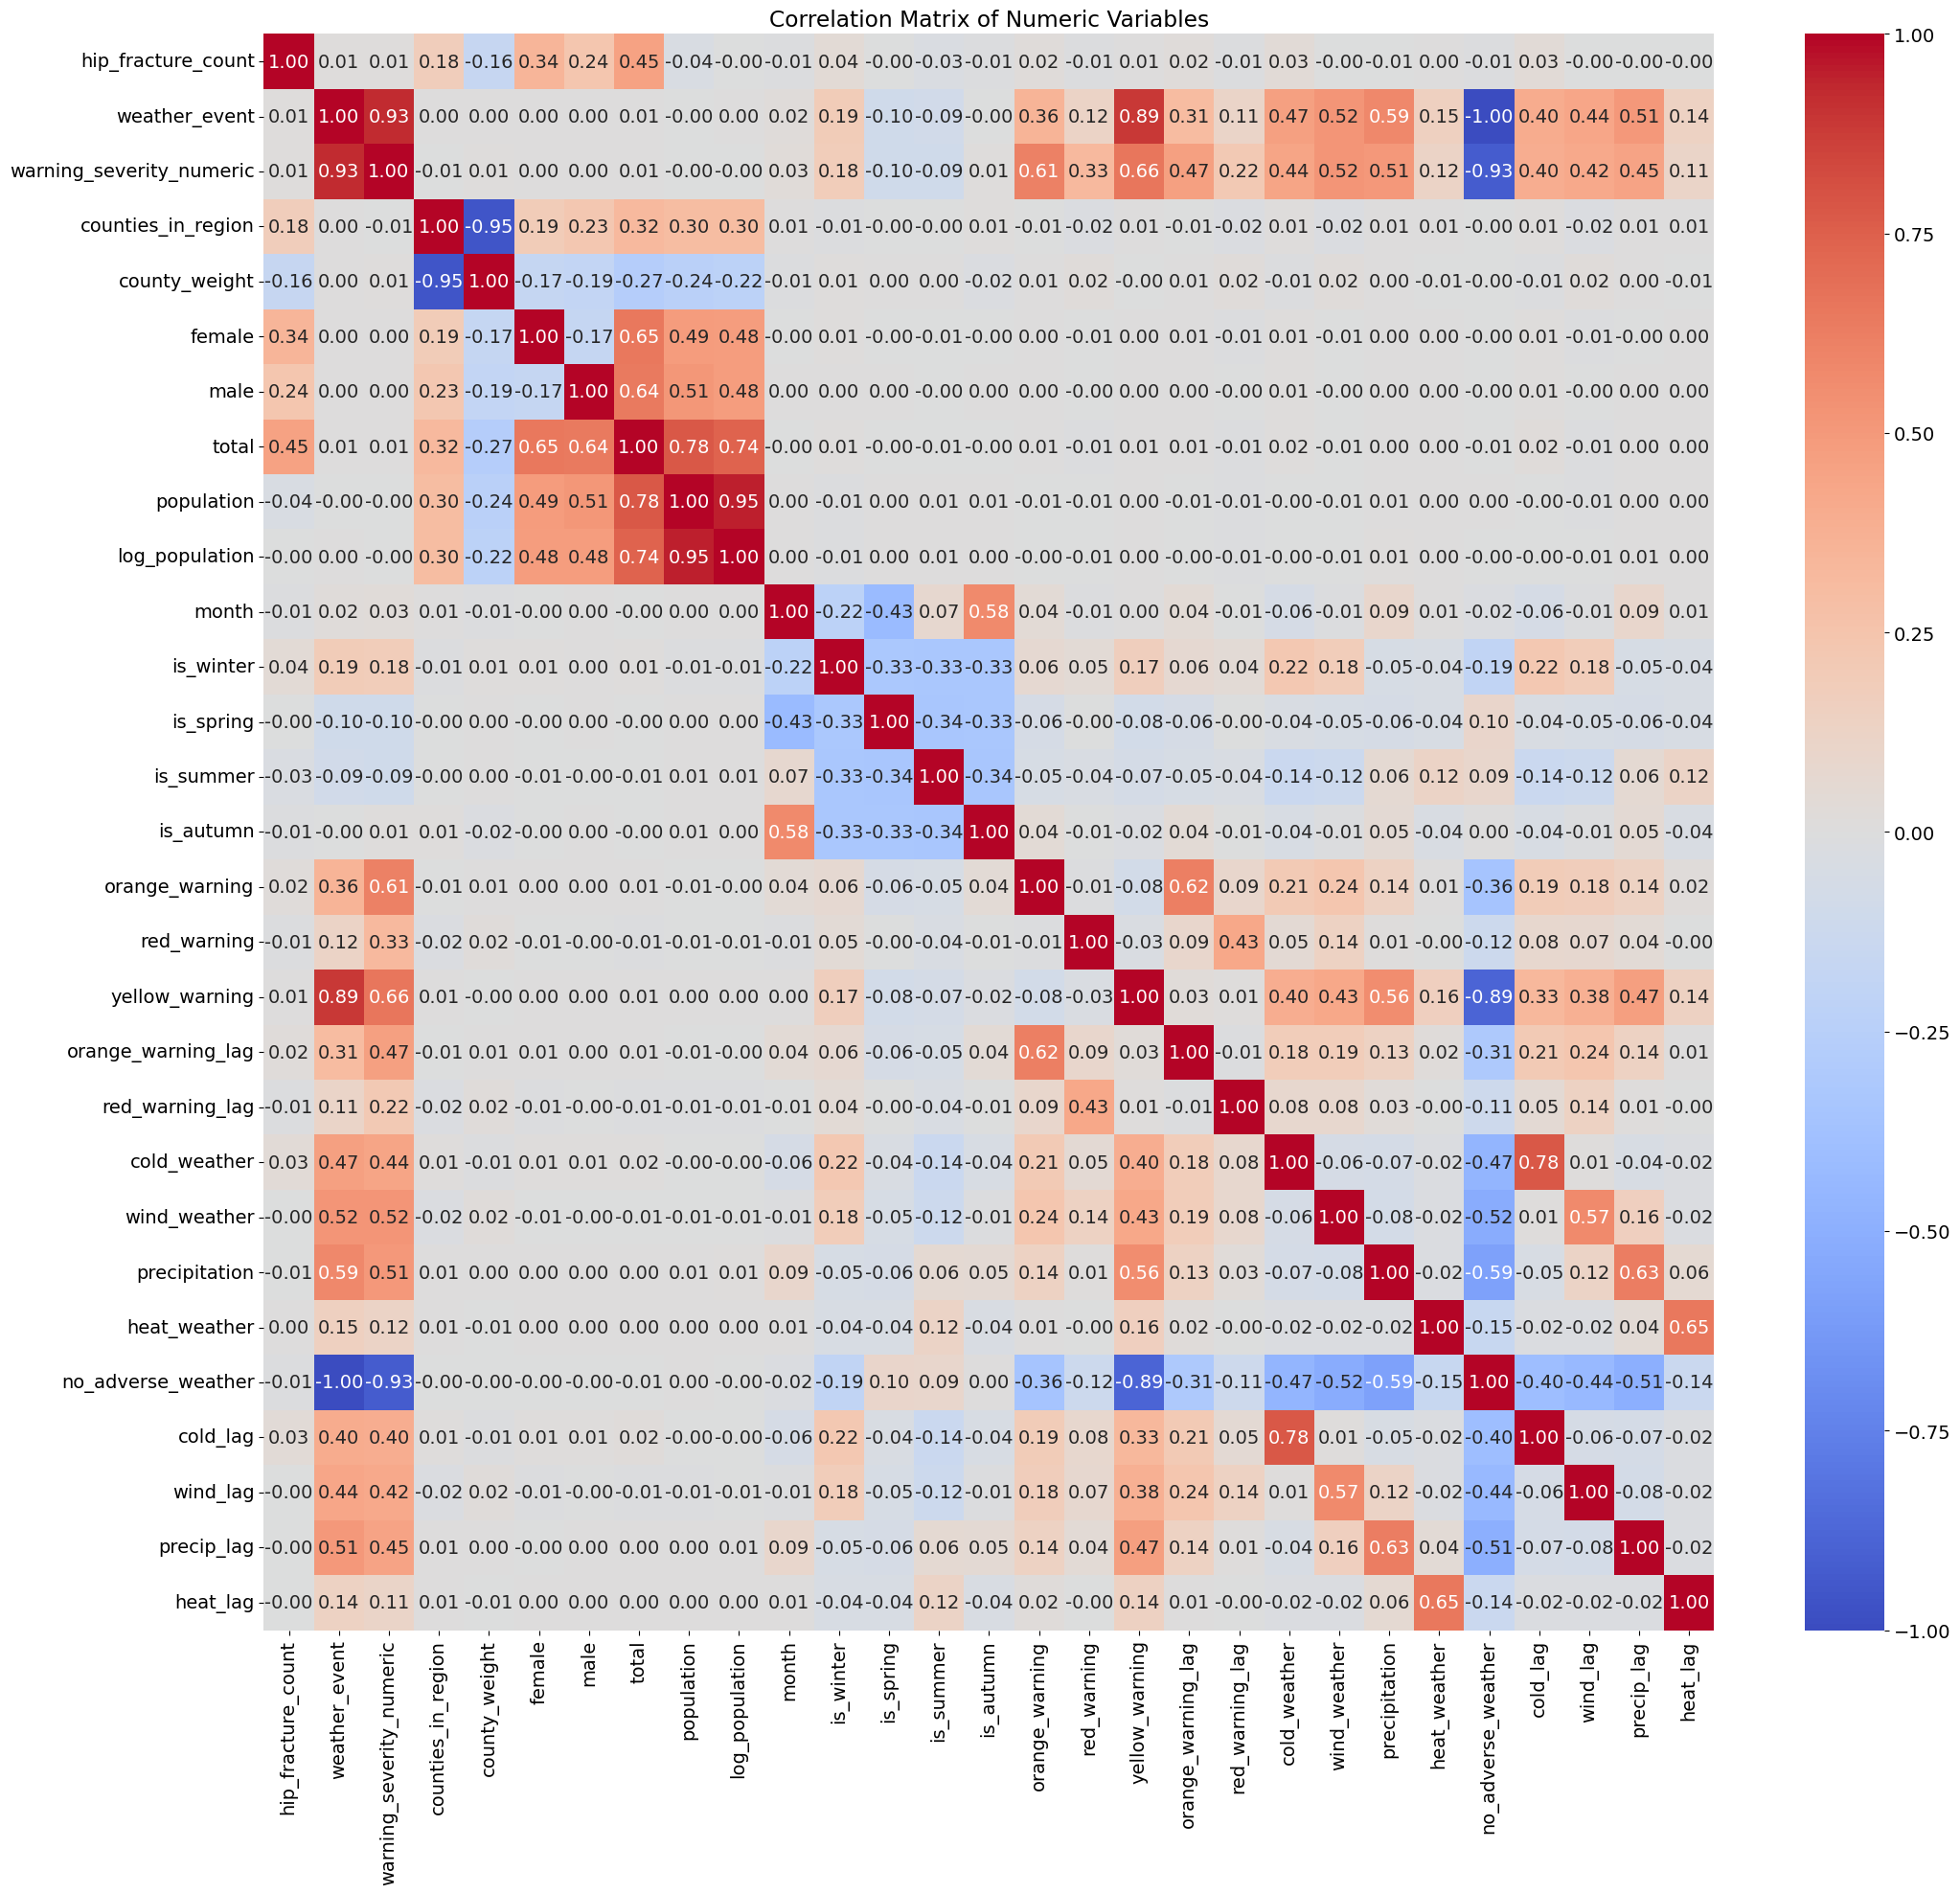

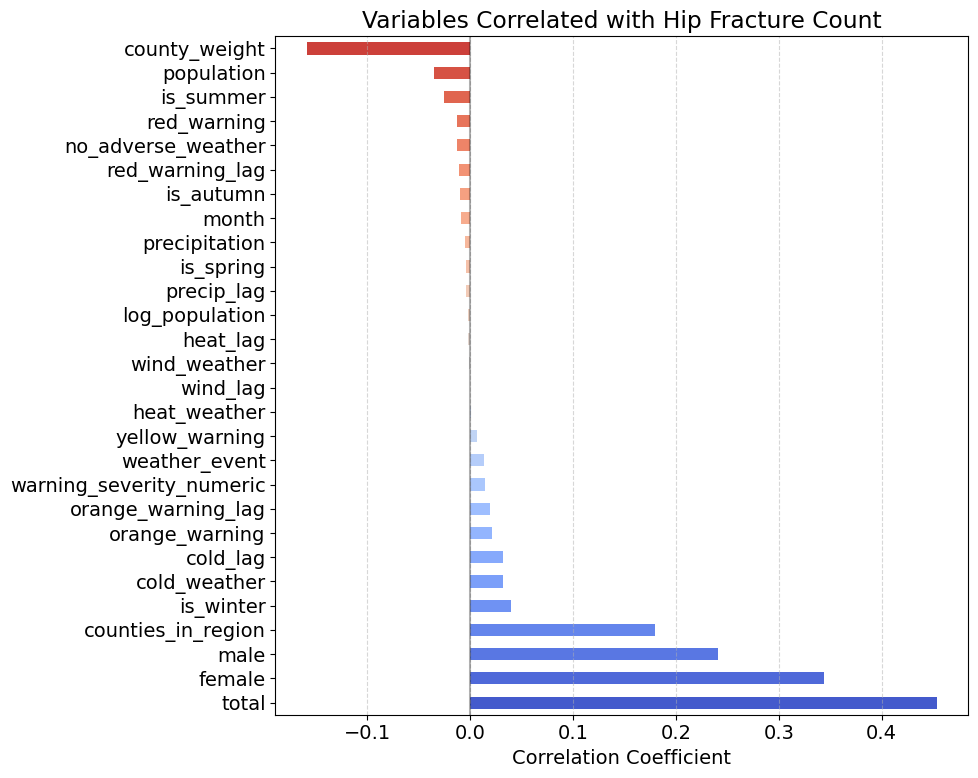

<Figure size 1500x1000 with 0 Axes>

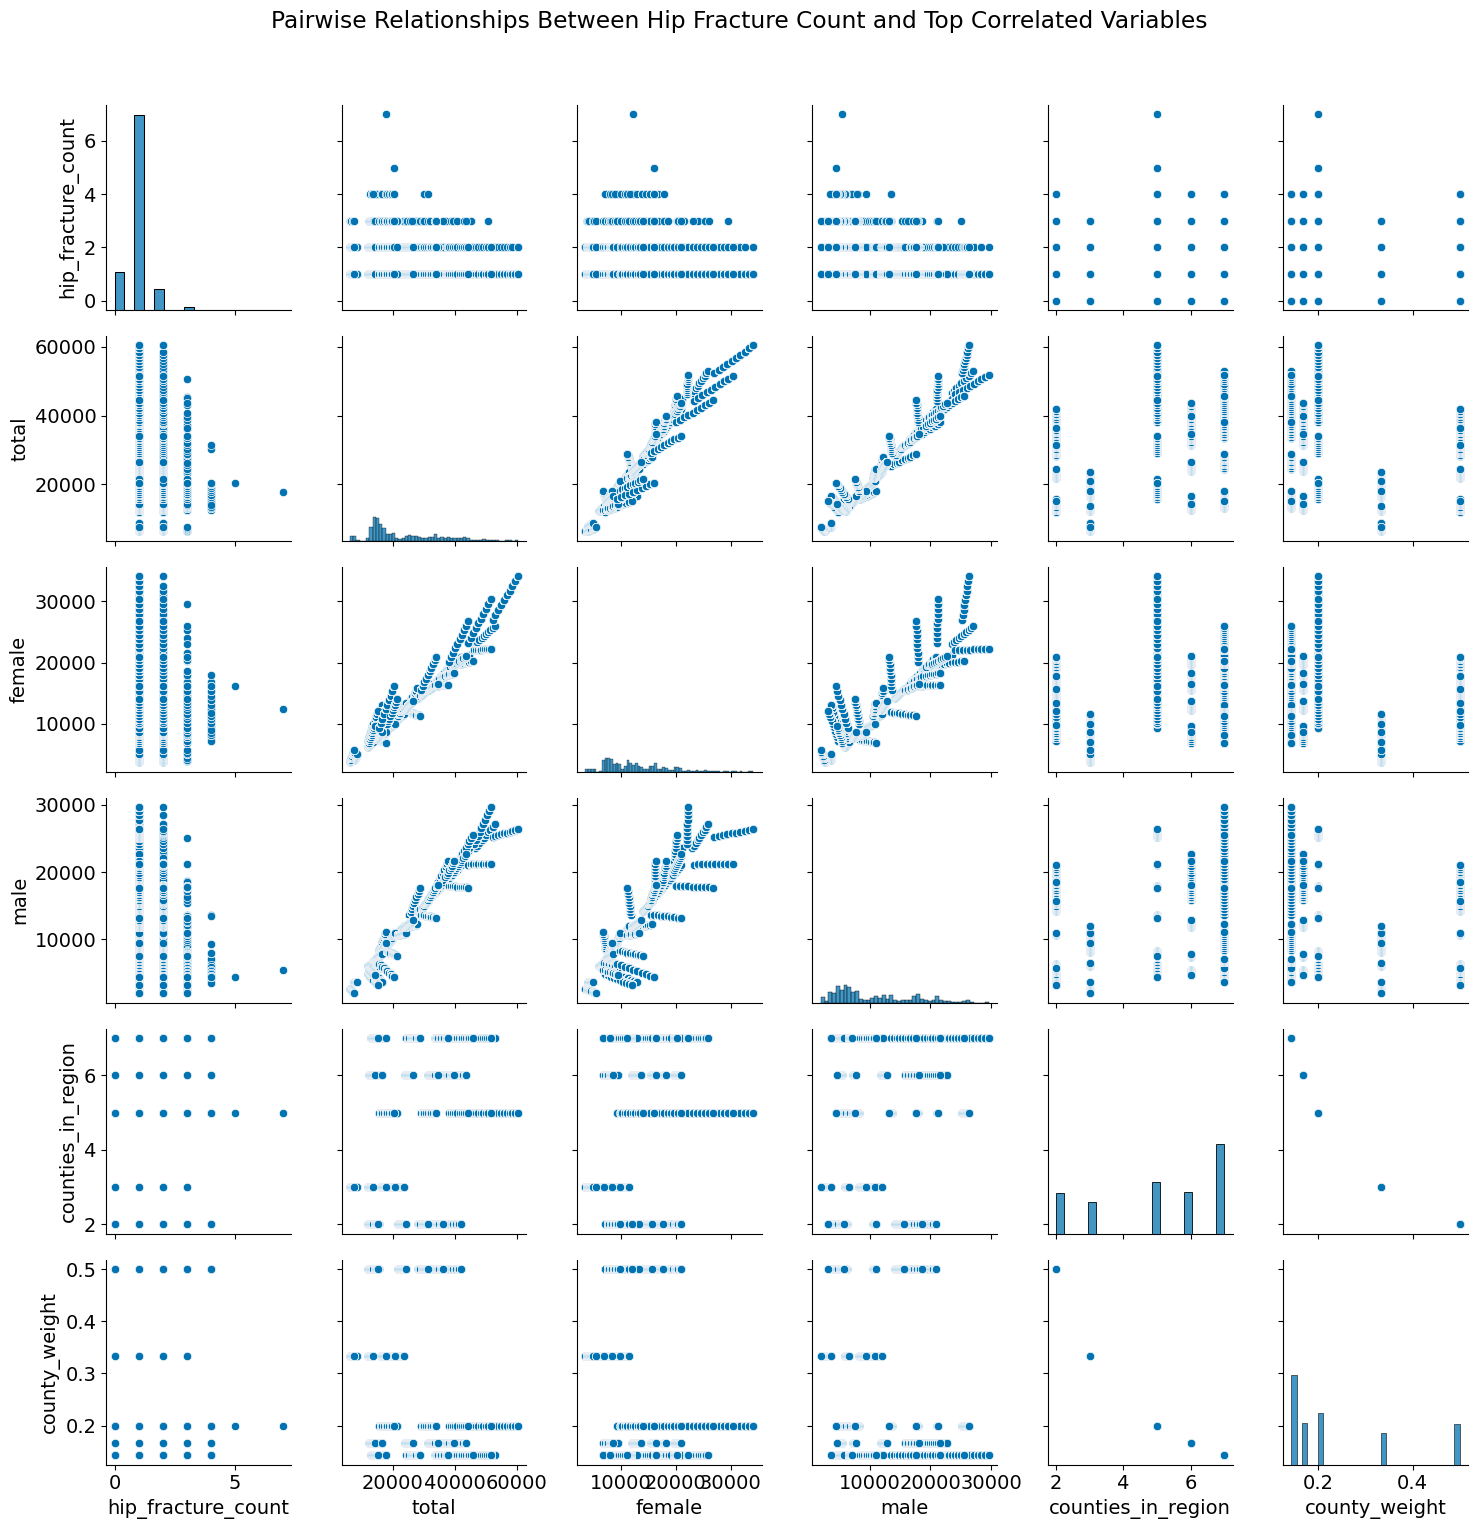

In [90]:
import matplotlib.pyplot as plt 
numeric_cols = df_final_expanded.select_dtypes(include=[np.number]).columns.tolist()

# Make sure 'hip_fracture_count' is included
if 'hip_fracture_count' not in numeric_cols:
    print("Warning: hip_fracture_count not found in numeric columns")
else:
    # Create a correlation matrix
    corr_matrix = df_final_expanded[numeric_cols].corr(method='pearson')
    
    # Sort correlations with hip_fracture_count
    hip_correlations = corr_matrix['hip_fracture_count'].sort_values(ascending=False)
    print("Correlations with hip_fracture_count:")
    print(hip_correlations)
    
    # Plot heatmap of correlations
    plt.figure(figsize=(22, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    # Create a bar plot of correlations with hip_fracture_count
    plt.figure(figsize=(10, 8))
    hip_correlations.drop('hip_fracture_count').plot(kind='barh', color=sns.color_palette("coolwarm", len(hip_correlations)))
    plt.title('Variables Correlated with Hip Fracture Count')
    plt.xlabel('Correlation Coefficient')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    # Optional: Create pairplots for top correlated variables
    top_correlated = hip_correlations.drop('hip_fracture_count').abs().nlargest(5).index.tolist()
    top_vars = ['hip_fracture_count'] + top_correlated
    
    plt.figure(figsize=(15, 10))
    sns.pairplot(df_final[top_vars], height=2.5)
    plt.suptitle('Pairwise Relationships Between Hip Fracture Count and Top Correlated Variables', y=1.02)
    plt.tight_layout()
    plt.show()

### Step 8.2: Save complete final merged and aggregated dataset.

In [92]:
df_final_expanded.to_csv('/home/paulharford/college/project/project_data/processed/WEATHERED_merged.csv', index=False)

### Step 9: Poisson Modeling
#### In ealrier testing (notebooks in archive) there was under-dispersion in te strict poisson modle so we will scale for that using a quasi-poisson modle with a scaling parameter

In [94]:
## The quasi poission model formula
formula = """
hip_fracture_count ~ 
C(weather_event, Treatment(reference=0)) +
C(warning_severity_numeric, Treatment(reference=0)) +
C(gender, Treatment(reference='Female')) +
counties_in_region + 
C(region, Treatment(reference='HSE South West')):C(weather_event, Treatment(reference=0)) +
C(gender, Treatment(reference='Female')):C(weather_event, Treatment(reference=0)) +
C(age_group, Treatment(reference='60-64')):C(weather_event, Treatment(reference=0))
"""
offset = df_final_expanded["log_population"]
poisson_model = smf.glm(
    formula=formula, 
    data=df_final_expanded, 
    family=sm.families.Poisson(),offset=offset,freq_weights=df_final_expanded['county_weight'], 
    )

# Fit the regular Poisson model
poisson_results_2 = poisson_model.fit()

# Calculate the dispersion parameter
dispersion = poisson_results_2.deviance / poisson_results_2.df_resid
print(f"Dispersion parameter: {dispersion:.4f}")

# Fit the quasi-Poisson model by specifying the scale parameter
quasi_poisson_results = poisson_model.fit(scale=dispersion)

# Print the summary of the quasi-Poisson model
print(quasi_poisson_results.summary())
# Optionally, check for overdispersion:
print("Residual Deviance:", quasi_poisson_results.deviance)
print("Degrees of Freedom:", quasi_poisson_results.df_resid)

Dispersion parameter: 0.6734
                 Generalized Linear Model Regression Results                  
Dep. Variable:     hip_fracture_count   No. Observations:                97119
Model:                            GLM   Df Residuals:                 25496.73
Model Family:                 Poisson   Df Model:                           25
Link Function:                    Log   Scale:                         0.67344
Method:                          IRLS   Log-Likelihood:                -23978.
Date:                Sun, 20 Apr 2025   Deviance:                       17170.
Time:                        14:54:59   Pearson chi2:                 2.11e+04
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08686
Covariance Type:            nonrobust                                         
                                                                                                                                  coef    std err          z      P>|z|      [0.025  

### Step 9.1: Create DF with Incidence Rate Ratios (IRR) with 95% Confidence Intervals: 

In [96]:
# After fitting the quasi-Poisson model
print("\nIncidence Rate Ratios (IRR) with 95% Confidence Intervals:")
params = quasi_poisson_results.params
conf = quasi_poisson_results.conf_int()

# Create a DataFrame for better formatting
irr_df = pd.DataFrame({
    'IRR': np.exp(params),
    'Lower CI': np.exp(conf[0]),
    'Upper CI': np.exp(conf[1]),
    'p-value': quasi_poisson_results.pvalues
})

print(irr_df)


Incidence Rate Ratios (IRR) with 95% Confidence Intervals:
                                                          IRR   Lower CI  \
Intercept                                            0.000009   0.000008   
C(weather_event, Treatment(reference=0))[T.1.0]      0.936564   0.781962   
C(warning_severity_numeric, Treatment(reference...   1.041680   0.934105   
C(warning_severity_numeric, Treatment(reference...   1.177366   1.040619   
C(warning_severity_numeric, Treatment(reference...   0.763646   0.585167   
C(gender, Treatment(reference='Female'))[T.Male]     0.802017   0.767234   
C(region, Treatment(reference='HSE South West')...   1.732823   1.607528   
C(region, Treatment(reference='HSE South West')...   1.842587   1.739893   
C(region, Treatment(reference='HSE South West')...   2.627946   2.446621   
C(region, Treatment(reference='HSE South West')...   0.827890   0.774870   
C(region, Treatment(reference='HSE South West')...   1.824834   1.701916   
C(region, Treatment(referenc

### Step 10: Calculate rates based on per 50k and plot initial results

In [97]:
def calculate_hip_fracture_rates(model, df, optional_vars=None, reference_population=50000):
    """
    Calculate hip fracture rates using the quasi-Poisson model, including regions, gender, and age groups.
    
    Parameters:
    -----------
    model : statsmodels GLM results
        Fitted quasi-Poisson model
    df : pandas DataFrame
        Dataset used for modeling
    optional_vars : dict or None, optional 
        Dictionary of optional variables to include (e.g., {'is_winter': 1})
    reference_population : int, optional (default=50000)
        Population size to standardize rates for
    
    Returns:
    --------
    pandas DataFrame
        Table of rates by region, gender, age group, and warning severity
    """
    # Initialize empty list for results
    results = []
    
    # Get unique values
    regions = sorted(df['region'].unique().tolist())
    genders = sorted(df['gender'].unique().tolist())
    
    # Check if age_group exists in the dataset
    include_age_groups = 'age_group' in df.columns
    age_groups = sorted(df['age_group'].unique().tolist()) if include_age_groups else [None]
    
    # Set up the optional variables
    if optional_vars is None:
        optional_vars = {}  # Empty dictionary if no optional variables
    
    # Define scenarios based on the model's structure
    scenarios = [
        {"name": "Baseline", "warning_color": "None", "weather_event": 0, "warning_severity_numeric": 0},
        {"name": "Yellow Warning", "warning_color": "Yellow", "weather_event": 1, "warning_severity_numeric": 1},
        {"name": "Orange Warning", "warning_color": "Orange", "weather_event": 1, "warning_severity_numeric": 2},
        {"name": "Red Warning", "warning_color": "Red", "weather_event": 1, "warning_severity_numeric": 3}
    ]
    
    # Create region to county count mapping if needed
    region_county_counts = {}
    if 'counties_in_region' in df.columns:
        for region in regions:
            region_data = df[df['region'] == region]
            if not region_data.empty:
                region_county_counts[region] = region_data['counties_in_region'].iloc[0]
    
    for region in regions:
        for gender in genders:
            for age_group in age_groups:
                # Filter data for this demographic group
                if include_age_groups:
                    demo_data = df[(df['region'] == region) & (df['gender'] == gender) & (df['age_group'] == age_group)]
                else:
                    demo_data = df[(df['region'] == region) & (df['gender'] == gender)]
                
                if len(demo_data) == 0:
                    continue
                
                # Get the population for this demographic - use the same source as in your model
                if 'population' in demo_data.columns:
                    demo_population = demo_data['population'].mean()
                elif 'total' in demo_data.columns:
                    demo_population = demo_data['total'].mean()
                else:
                    # Try to determine population from gender-specific columns
                    gender_col = gender.lower()
                    if gender_col in demo_data.columns:
                        demo_population = demo_data[gender_col].mean()
                    else:
                        continue  # Skip if we can't determine the population
                
                if pd.isna(demo_population) or demo_population <= 0:
                    continue
                
                for scenario in scenarios:
                    # Create a new DataFrame with exactly one row
                    pred_row = pd.DataFrame({col: [0] for col in df.columns})
                    
                    # Set key values needed by the model formula
                    pred_row['region'] = region
                    pred_row['gender'] = gender
                    
                    # Add age_group if it's in the model
                    if include_age_groups:
                        pred_row['age_group'] = age_group
                    
                    pred_row['weather_event'] = scenario["weather_event"]
                    pred_row['warning_severity_numeric'] = scenario["warning_severity_numeric"]
                    
                    # Add counties_in_region if it's in the model
                    if 'counties_in_region' in df.columns:
                        pred_row['counties_in_region'] = region_county_counts.get(region, 0)
                    
                    # Add county_weight if it's in the model
                    if 'county_weight' in df.columns:
                        if region_county_counts.get(region, 0) > 0:
                            pred_row['county_weight'] = 1 / region_county_counts.get(region, 1)
                        else:
                            pred_row['county_weight'] = 1
                    
                    # Add any optional variables
                    for var_name, var_value in optional_vars.items():
                        if var_name in pred_row.columns:
                            pred_row[var_name] = var_value
                    
                    # Set the population and log_population variables
                    pred_row['population'] = demo_population
                    pred_row['log_population'] = np.log(demo_population)
                    
                    try:
                        # Get predicted value (this is already a rate per person because of the offset)
                        predicted_rate = model.predict(pred_row).iloc[0]
                        
                        # Scale to reference population (e.g., per 50,000)
                        # Since predicted_rate is already per person, we just multiply by reference population
                        standardized_rate = predicted_rate * reference_population
                        
                        # Create result dictionary
                        result_dict = {
                            'Region': region,
                            'Gender': gender,
                            'Warning Color': scenario["warning_color"],
                            'Scenario': scenario["name"],
                            f'Rate per {reference_population:,}': standardized_rate
                        }
                        
                        # Add age_group if it's in the model
                        if include_age_groups:
                            result_dict['Age Group'] = age_group
                        
                        # Store result
                        results.append(result_dict)
                        
                    except Exception as e:
                        if include_age_groups:
                            print(f"Error predicting for {region}, {gender}, {age_group}, scenario={scenario['name']}: {str(e)}")
                        else:
                            print(f"Error predicting for {region}, {gender}, scenario={scenario['name']}: {str(e)}")
                        
                        # Additional diagnostic output
                        if hasattr(model, 'model') and hasattr(model.model, 'exog_names'):
                            print(f"Model formula terms: {model.model.exog_names}")
                        print(f"Prediction data columns: {pred_row.columns.tolist()}")
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by key dimensions
    if not results_df.empty:
        sort_columns = ['Region', 'Gender', 'Warning Color']
        if include_age_groups:
            sort_columns.insert(2, 'Age Group')
        results_df = results_df.sort_values(sort_columns)
    
    return results_df

def plot_rates_by_region(rates_df, pct_changes=None, reference_population=50000, save_path=None):
    """
    Create bar plots showing hip fracture rates by gender, age group, and warning severity for each region.
    
    Parameters:
    -----------
    rates_df : pandas DataFrame
        Output from calculate_hip_fracture_rates function
    pct_changes : dict or None, optional
        Dictionary with percentage changes from baseline (from calculate_percentage_changes)
    reference_population : int, optional (default=50000)
        Population size used for standardization
    save_path : str or None, optional (default=None)
        If provided, saves the plot to this file path
    
    Returns:
    --------
    None (displays plots)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Check if we have any data to plot
    if rates_df.empty:
        print("No data available to plot.")
        return
    
    # Define colors for warning levels
    warning_colors = {
        'None': 'gray',
        'Yellow': 'gold',
        'Orange': 'darkorange',
        'Red': 'darkred'
    }
    
    # Get unique regions
    regions = rates_df['Region'].unique()
    
    # Check if we have age groups in the data
    include_age_groups = 'Age Group' in rates_df.columns
    
    # For each region, create a separate plot
    for region in regions:
        region_data = rates_df[rates_df['Region'] == region].copy()
        
        # Get unique genders
        genders = sorted(region_data['Gender'].unique())
        
        # Get unique age groups for this region (if applicable)
        if include_age_groups:
            age_groups = sorted(region_data['Age Group'].unique())
        else:
            age_groups = [None]
        
        # Check if we have any genders to plot
        if len(genders) == 0:
            print(f"No data available for region {region}")
            continue
        
        # Set up the plot
        if include_age_groups:
            # Use 2-across, N-down layout
            num_age_groups = len(age_groups)
            plot_cols = 2  # Fixed to 2 across
            plot_rows = (num_age_groups + 1) // 2  # Calculate rows needed (ceiling division)
            
            # Make the figure taller to accommodate the 2-across layout
            plt.figure(figsize=(16, 5 * plot_rows))
            plt.suptitle(f'Hip Fracture Rates in {region} per {reference_population:,} Population', 
                        fontsize=18, fontweight='bold')
            
            # Track legend handles and labels
            all_handles = []
            all_labels = []
            
            for i, age_group in enumerate(age_groups):
                # Create subplot (1-indexed)
                ax = plt.subplot(plot_rows, plot_cols, i+1)
                
                # Filter data for this age group
                age_data = region_data[region_data['Age Group'] == age_group]
                
                # Plot data for this age group
                _plot_rates(ax, age_data, genders, warning_colors, reference_population, pct_changes, 
                           title=f'Age Group: {age_group}', region=region)
                
                # Collect handles and labels for the legend
                handles, labels = ax.get_legend_handles_labels()
                if i == 0:  # Only collect from the first subplot to avoid duplicates
                    all_handles = handles
                    all_labels = labels
            
            # Create a single legend for the entire figure
            if all_handles:
                plt.figlegend(all_handles, all_labels, 
                             loc='lower center', ncol=min(4, len(all_handles)), 
                             bbox_to_anchor=(0.5, 0))
                
            plt.tight_layout(rect=[0, 0.1, 1, 0.95])
        else:
            # Single plot for the region
            fig, ax = plt.subplots(figsize=(12, 8))
            plt.title(f'Hip Fracture Rates in {region} per {reference_population:,} Population', 
                      fontsize=16, fontweight='bold')
            
            # Plot data for this region
            _plot_rates(ax, region_data, genders, warning_colors, reference_population, pct_changes, region=region)
            
            plt.tight_layout()
        
        # Save the plot if a path is provided
        if save_path:
            # Create a region-specific filename if a directory is provided
            if save_path.endswith('/') or save_path.endswith('\\'):
                file_path = f"{save_path}hip_fracture_rates_{region.replace(' ', '_')}.png"
            else:
                file_path = save_path
            plt.savefig(file_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to: {file_path}")
        
        plt.show()
        
def _plot_rates(ax, data, genders, warning_colors, reference_population, pct_changes=None, title=None, region=None):
    """
    Helper function to plot rates for a specific region and age group.
    
    Parameters:
    -----------
    ax : matplotlib Axes
        The axes to plot on
    data : pandas DataFrame
        Data for this region/age group
    genders : list
        List of genders to plot
    warning_colors : dict
        Dictionary mapping warning colors to actual colors
    reference_population : int
        Population size for standardization
    pct_changes : dict or None
        Dictionary with percentage changes
    title : str or None
        Title for the subplot
    region : str or None
        Region name (used for percentage change lookup)
    """
    # Set up positions for grouped bars
    gender_positions = {gender: i for i, gender in enumerate(genders)}
    bar_width = 0.2
    
    # Plot bars for each warning color
    for warning_color, color in warning_colors.items():
        warning_data = data[data['Warning Color'] == warning_color]
        
        for gender, pos in gender_positions.items():
            gender_warning_data = warning_data[warning_data['Gender'] == gender]
            if not gender_warning_data.empty:
                rate_col = f'Rate per {reference_population:,}'
                rate = gender_warning_data[rate_col].values[0]
                
                # Calculate position for this bar
                x_pos = pos + (list(warning_colors.keys()).index(warning_color) * bar_width)
                
                # Create bar
                bar = ax.bar(x_pos, rate, width=bar_width, color=color, 
                          label=f'{warning_color} Warning')
                
                # Add text with rate value
                ax.text(x_pos, rate, f'{rate:.1f}', 
                       ha='center', va='bottom', fontsize=9)
                
                # Add percentage change for non-baseline scenarios
                if pct_changes is not None and warning_color != 'None':
                    # Determine the key based on whether we have age groups
                    if 'Age Group' in data.columns:
                        age_group = data['Age Group'].iloc[0]
                        key = (region, gender, age_group, warning_color)
                    else:
                        key = (region, gender, warning_color)
                    
                    if key in pct_changes:
                        pct_change = pct_changes[key]
                        
                        # Position the percentage change text below the rate value
                        ax.text(x_pos, rate * 0.5, f'({pct_change:+.1f}%)', 
                               ha='center', va='center', fontsize=9, 
                               color='white' if pct_change < 0 else 'black',
                               fontweight='bold')
    
    # Set plot details
    if title:
        ax.set_title(title)
    ax.set_xticks([p + (len(warning_colors) * bar_width) / 2 - bar_width/2 for p in range(len(gender_positions))])
    ax.set_xticklabels(gender_positions.keys())
    ax.set_xlabel('Gender')
    ax.set_ylabel(f'Rate per {reference_population:,}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Keep only unique labels
    ax.legend(by_label.values(), by_label.keys())

In [98]:
def calculate_percentage_changes(rates_df, reference_population=50000):
    """
    Calculate percentage changes from baseline for all combinations in the rates DataFrame.
    
    Parameters:
    -----------
    rates_df : pandas DataFrame
        Output from calculate_hip_fracture_rates function
    reference_population : int, optional (default=50000)
        Population size used for standardization
    
    Returns:
    --------
    dict
        Dictionary with keys and percentage change values
    """
    pct_changes = {}
    rate_col = f'Rate per {reference_population:,}'
    
    # Check if we have age groups in the data
    include_age_groups = 'Age Group' in rates_df.columns
    
    # First, store all baseline rates
    baselines = {}
    baseline_data = rates_df[rates_df['Warning Color'] == 'None']
    
    for _, row in baseline_data.iterrows():
        region = row['Region']
        gender = row['Gender']
        
        if include_age_groups:
            age_group = row['Age Group']
            baselines[(region, gender, age_group)] = row[rate_col]
        else:
            baselines[(region, gender)] = row[rate_col]
    
    # Then calculate percentage changes for all non-baseline scenarios
    warning_data = rates_df[rates_df['Warning Color'] != 'None']
    
    for _, row in warning_data.iterrows():
        region = row['Region']
        gender = row['Gender']
        warning = row['Warning Color']
        current_rate = row[rate_col]
        
        # Get the corresponding baseline rate
        if include_age_groups:
            age_group = row['Age Group']
            baseline_key = (region, gender, age_group)
            if baseline_key in baselines and baselines[baseline_key] > 0:
                baseline_rate = baselines[baseline_key]
                pct_change = ((current_rate - baseline_rate) / baseline_rate) * 100
                pct_changes[(region, gender, age_group, warning)] = pct_change
        else:
            baseline_key = (region, gender)
            if baseline_key in baselines and baselines[baseline_key] > 0:
                baseline_rate = baselines[baseline_key]
                pct_change = ((current_rate - baseline_rate) / baseline_rate) * 100
                pct_changes[(region, gender, warning)] = pct_change
    
    return pct_changes

In [99]:
def plot_nationwide_rates(rates_df, pct_changes, reference_population=50000, save_path=None):
    """
    Create a consolidated plot showing hip fracture rates across all of Ireland,
    summarizing the data from all regions with clear separation between gender groups.
    
    Parameters:
    -----------
    rates_df : pandas DataFrame
        Output from calculate_hip_fracture_rates function
    pct_changes : dict
        Dictionary with (region, gender, warning) keys and percentage change values
    reference_population : int, optional (default=100000)
        Population size used for standardization
    save_path : str or None, optional (default=None)
        If provided, saves the plot to this file path
    
    Returns:
    --------
    None (displays plot)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    
    # Check if we have any data to plot
    if rates_df.empty:
        print("No data available to plot.")
        return
    
    # Define colors for warning levels
    warning_colors = {
        'None': 'gray',
        'Yellow': 'gold',
        'Orange': 'darkorange',
        'Red': 'darkred'
    }
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(14, 8))
    plt.title('Hip Fracture Rates Across Ireland by Gender and Weather Warning Level', 
              fontsize=18, fontweight='bold')
    
    # Extract unique genders and warning levels
    genders = sorted(rates_df['Gender'].unique())
    warning_levels = sorted(rates_df['Warning Color'].unique())
    
    # Calculate average rates for each gender and warning level combination
    summary_data = []
    for gender in genders:
        for warning in warning_levels:
            subset = rates_df[(rates_df['Gender'] == gender) & 
                             (rates_df['Warning Color'] == warning)]
            
            if not subset.empty:
                rate_col = f'Rate per {reference_population:,}'
                avg_rate = subset[rate_col].mean()
                
                # Calculate average percentage change if not baseline
                avg_pct_change = 0
                if warning != 'None':
                    pct_values = [pct_changes.get((region, gender, warning), 0) 
                                 for region in rates_df['Region'].unique()]
                    pct_values = [p for p in pct_values if p != 0]  # Filter out missing values
                    avg_pct_change = sum(pct_values) / len(pct_values) if pct_values else 0
                
                summary_data.append({
                    'Gender': gender,
                    'Warning Color': warning,
                    'Average Rate': avg_rate,
                    'Average Pct Change': avg_pct_change
                })
    
    # Convert to DataFrame for easier plotting
    summary_df = pd.DataFrame(summary_data)
    
    # BAR CHART FOR RATES
    # We'll add a gap between gender groups
    width = 0.18  # Narrower bars to accommodate the gap
    group_gap = 0.8  # Gap between gender groups
    
    # Create positions for gender groups with a gap between them
    if len(genders) == 2:  # Assuming 'Male' and 'Female'
        # Position groups on either side of the center with a gap
        x = np.array([-group_gap/2, group_gap/2])
    else:
        # If more than 2 genders, space them evenly
        x = np.arange(len(genders)) * (1 + group_gap/len(genders))
    
    # Create a mapping from gender to position
    gender_positions = {gender: pos for gender, pos in zip(genders, x)}
    
    # Plot bars for each warning level within each gender group
    for i, warning in enumerate(warning_levels):
        warning_data = summary_df[summary_df['Warning Color'] == warning]
        
        if not warning_data.empty:
            for gender in genders:
                gender_warning_data = warning_data[warning_data['Gender'] == gender]
                
                if not gender_warning_data.empty:
                    # Get the position for this gender
                    pos = gender_positions[gender]
                    
                    # Calculate the offset for this warning level
                    offset = (i - len(warning_levels)/2 + 0.5) * width
                    
                    # Get the rate for this combination
                    rate = gender_warning_data['Average Rate'].values[0]
                    
                    # Create the bar
                    bar = ax.bar(pos + offset, rate, width, 
                                 label=f'{warning} Warning' if gender == genders[0] else "",
                                 color=warning_colors[warning])
                    
                    # Add rate label on top
                    ax.text(pos + offset, rate, f'{rate:.1f}', 
                            ha='center', va='bottom', fontsize=9)
                    
                    # Add percentage change for non-baseline warning levels
                    if warning != 'None':
                        pct_change = gender_warning_data['Average Pct Change'].values[0]
                        ax.text(pos + offset, rate*0.5, f'({pct_change:+.1f}%)', 
                                ha='center', va='center', fontsize=10, fontweight='bold',
                                color='white' if pct_change < 0 else 'black')
    
    # Set up the x-axis with gender labels
    ax.set_xticks(list(gender_positions.values()))
    ax.set_xticklabels(list(gender_positions.keys()), fontsize=12)
    
    # Add vertical lines to separate gender groups more clearly
    if len(genders) > 1:
        gender_positions_list = list(gender_positions.values())
        for i in range(len(gender_positions_list) - 1):
            mid_point = (gender_positions_list[i] + gender_positions_list[i+1]) / 2
            ax.axvline(x=mid_point, color='lightgray', linestyle='--', alpha=0.5)
    
    # Add y-axis label and grid
    ax.set_ylabel(f'Rate per {reference_population:,}', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add legend
    ax.legend(title='Warning Level', loc='upper right')
    
    # Add gender difference summary at the bottom
    summary_text = "Gender Differences in Weather Response Across Ireland:\n"
    for warning in [w for w in warning_levels if w != 'None']:
        if len(genders) > 1:
            male_data = summary_df[(summary_df['Gender'] == 'Male') & (summary_df['Warning Color'] == warning)]
            female_data = summary_df[(summary_df['Gender'] == 'Female') & (summary_df['Warning Color'] == warning)]
            
            if not male_data.empty and not female_data.empty:
                male_pct = male_data['Average Pct Change'].values[0]
                female_pct = female_data['Average Pct Change'].values[0]
                diff = male_pct - female_pct
                
                summary_text += f"• {warning} Warning: Male {male_pct:+.1f}%, Female {female_pct:+.1f}%, "
                summary_text += f"Difference: {diff:+.1f} percentage points\n"
    
    plt.figtext(0.5, 0.01, summary_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightyellow', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.15, 1, 0.98])
    
    # Save the plot if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Nationwide summary plot saved to: {save_path}")
    
    plt.show()
    

Plot saved to: /home/paulharford/college/project/ul_project_Msc_AI/analysis/processed_data/visual_outputs/WEATHERED


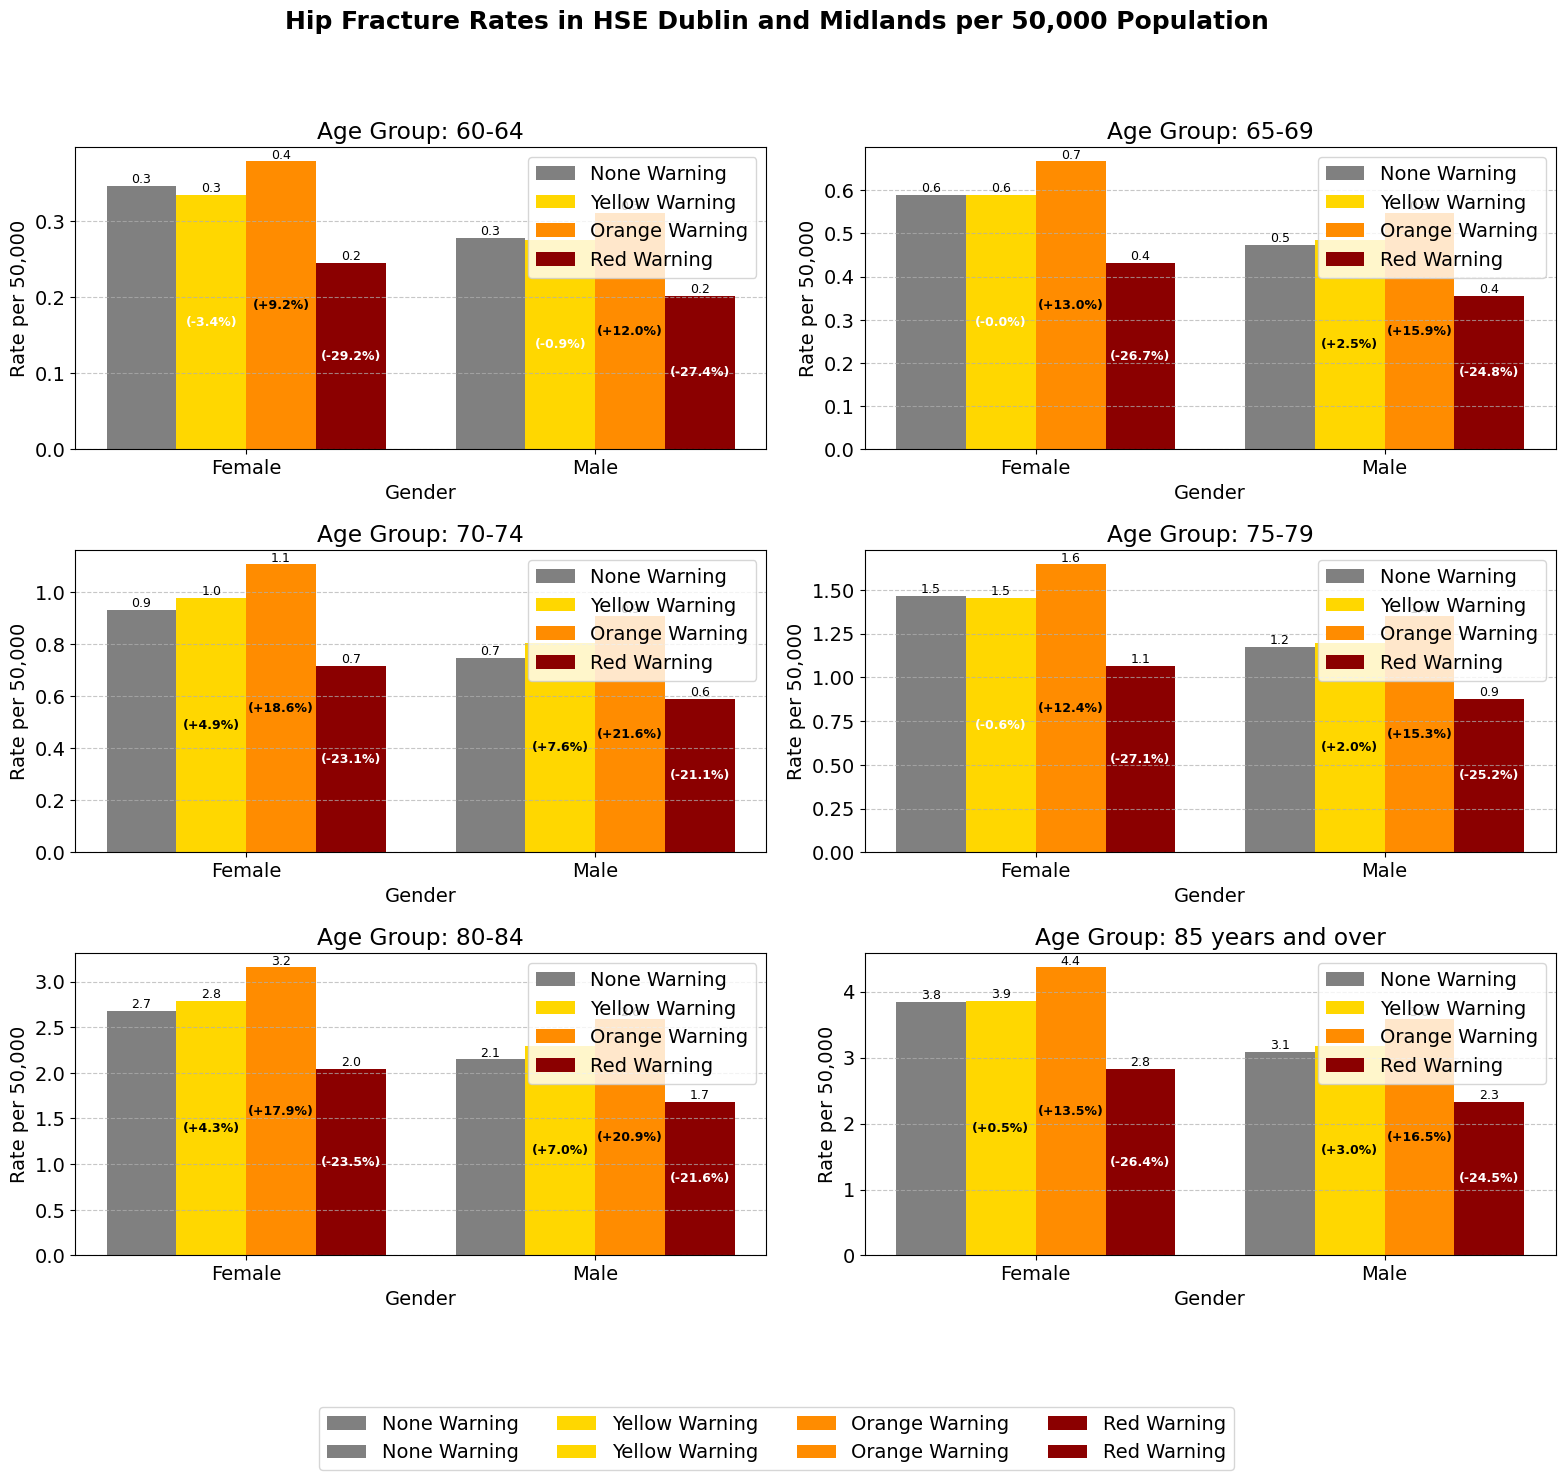

Plot saved to: /home/paulharford/college/project/ul_project_Msc_AI/analysis/processed_data/visual_outputs/WEATHERED


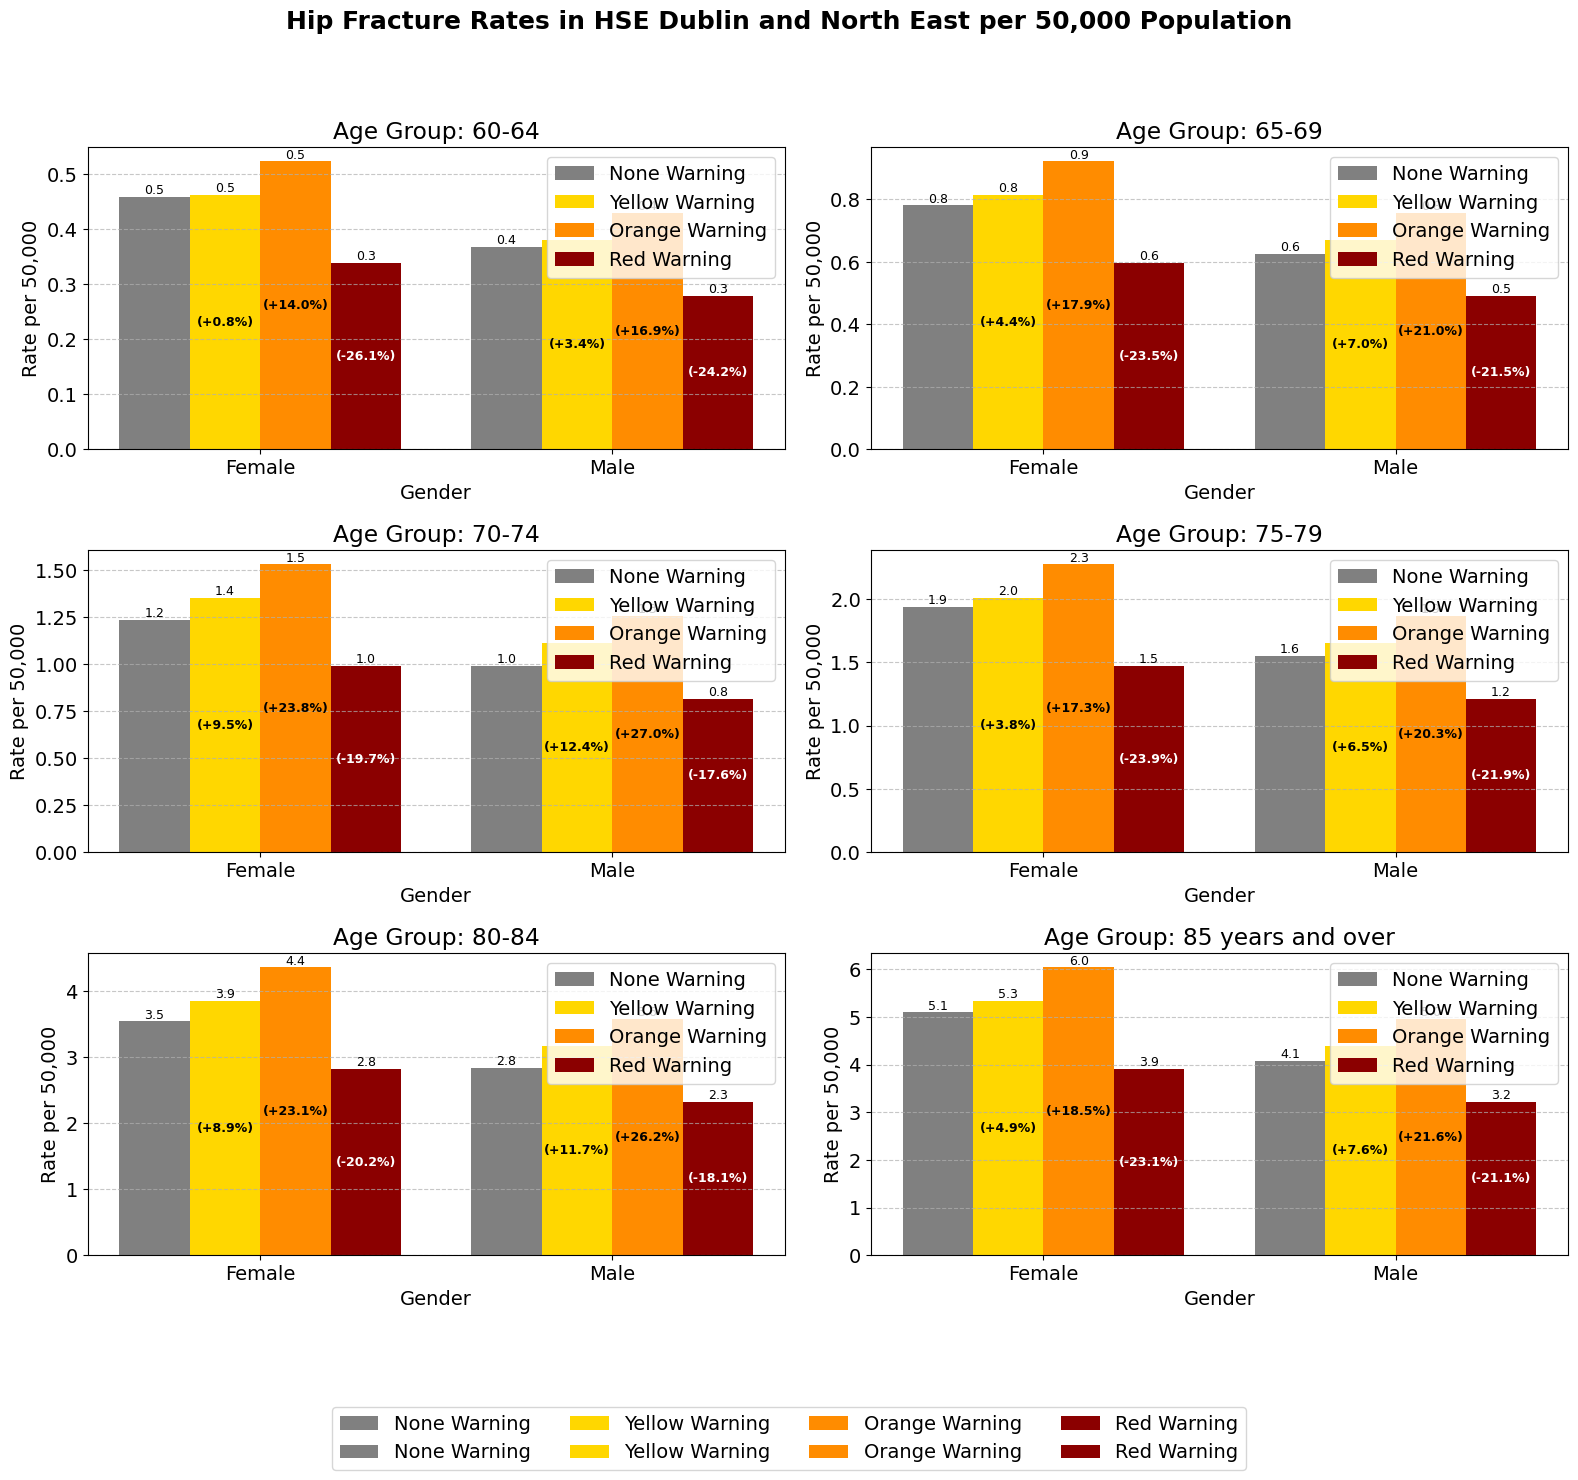

Plot saved to: /home/paulharford/college/project/ul_project_Msc_AI/analysis/processed_data/visual_outputs/WEATHERED


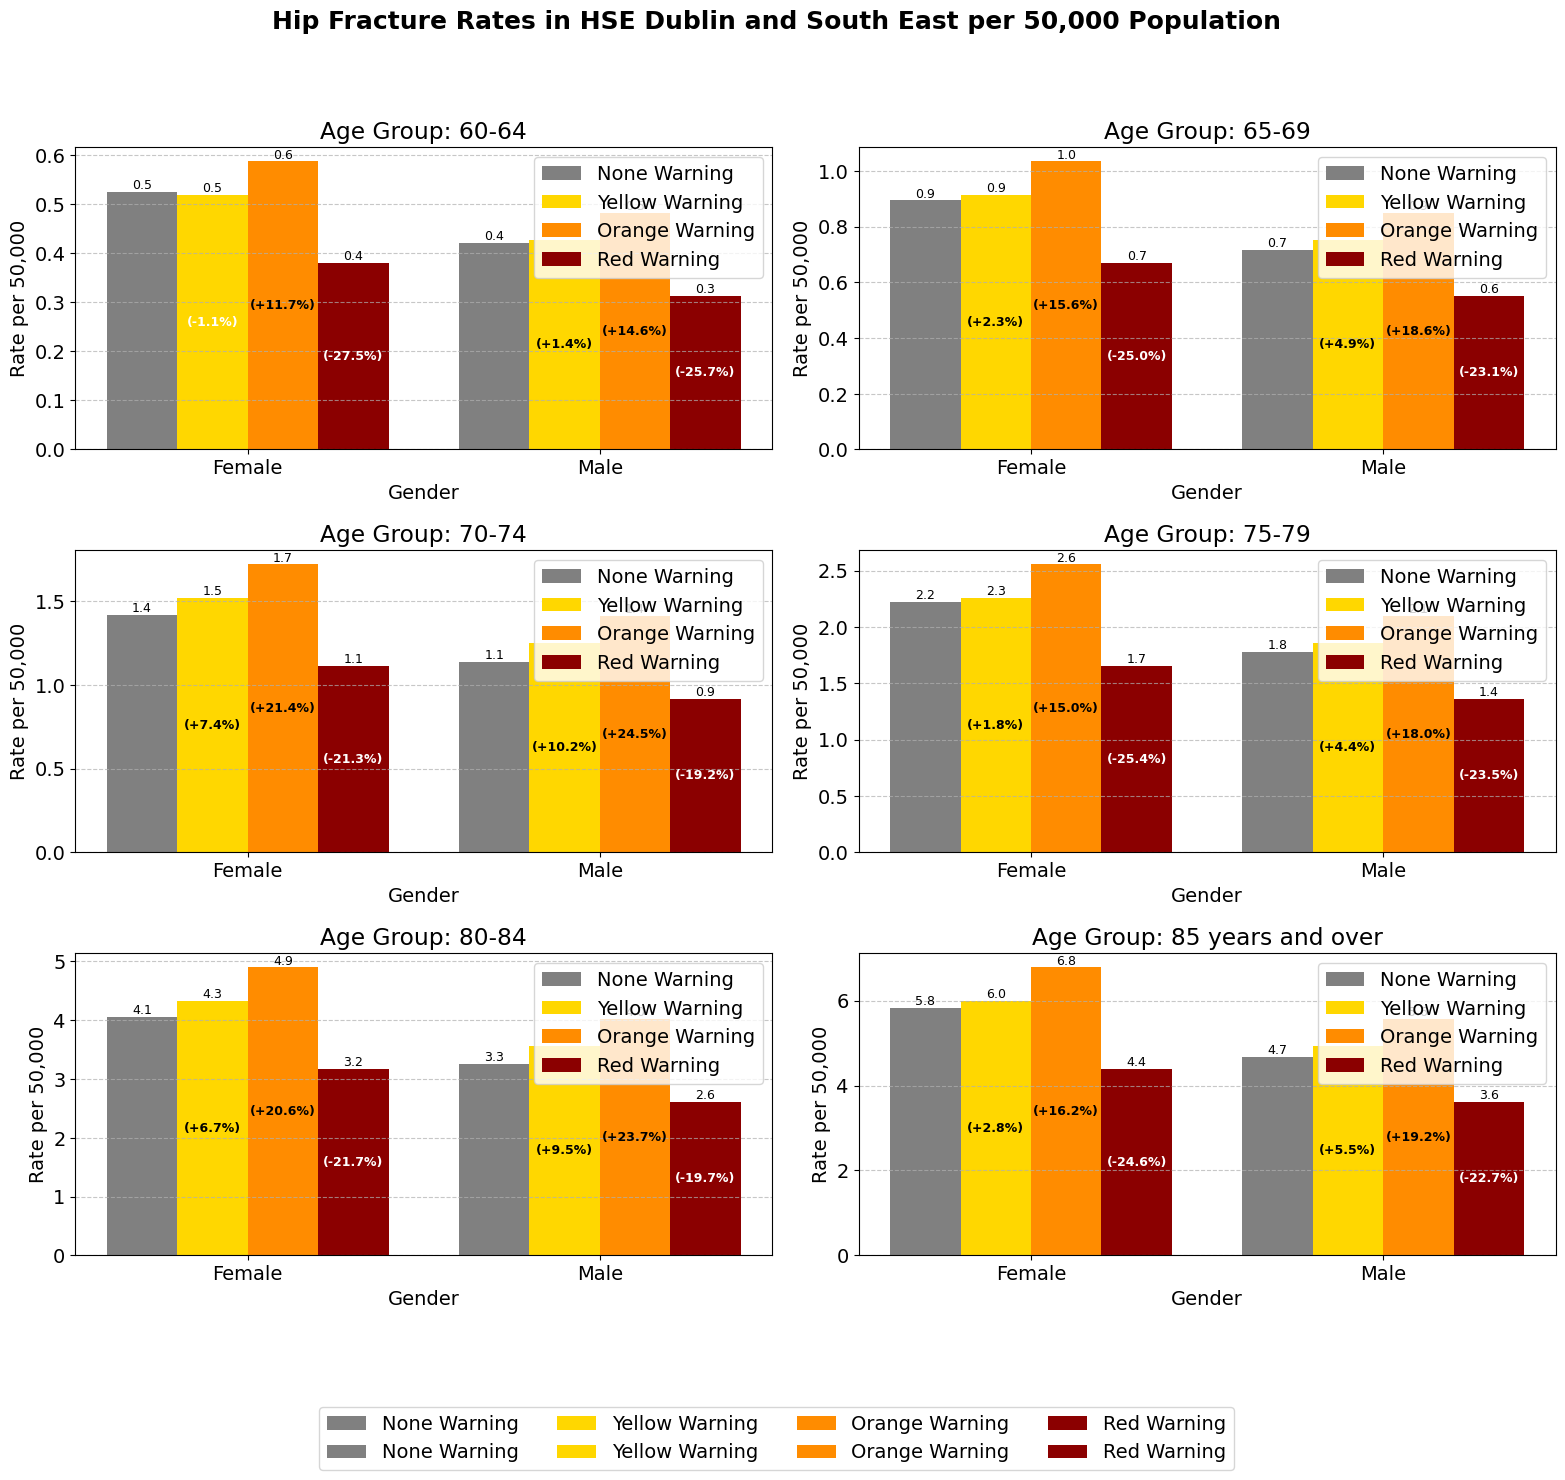

Plot saved to: /home/paulharford/college/project/ul_project_Msc_AI/analysis/processed_data/visual_outputs/WEATHERED


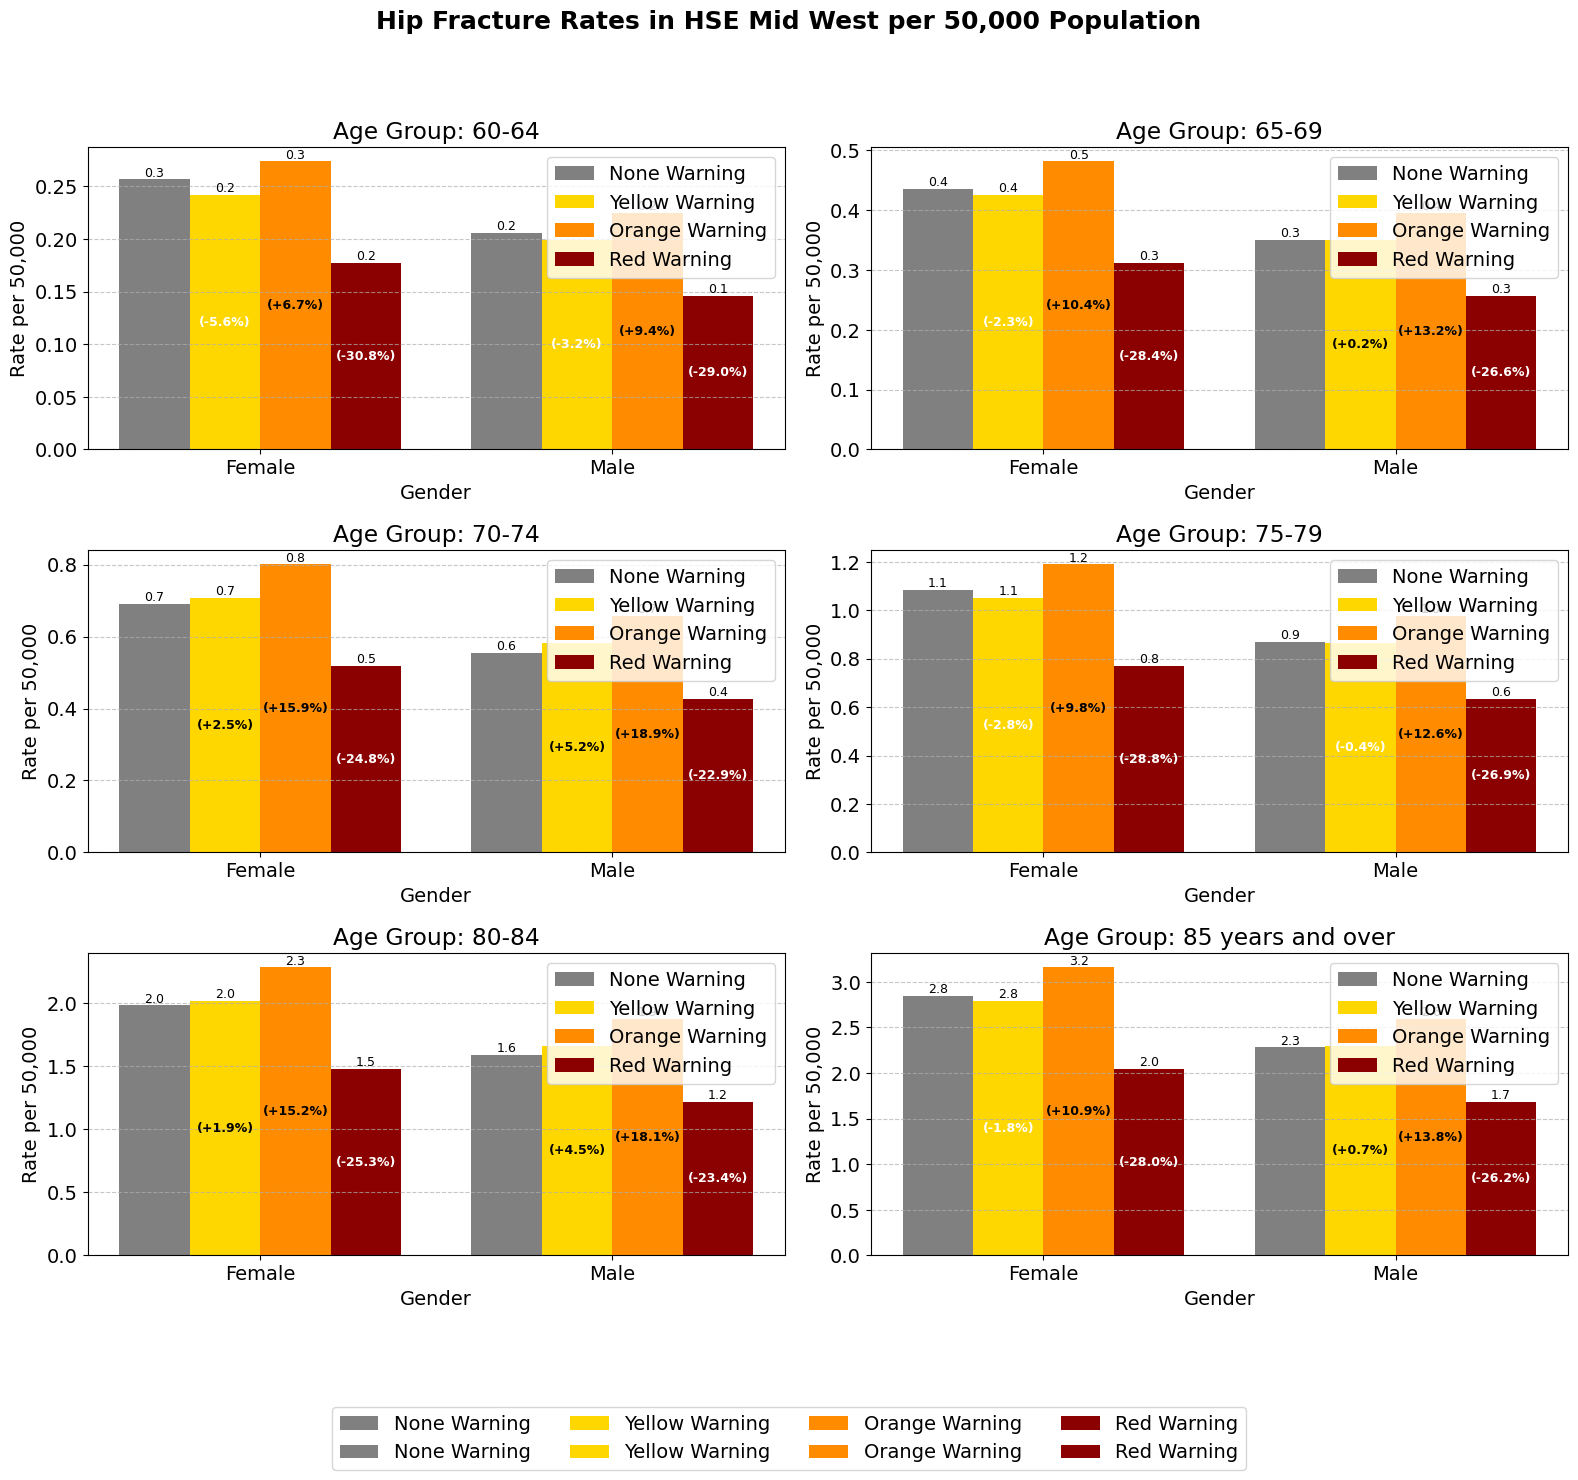

Plot saved to: /home/paulharford/college/project/ul_project_Msc_AI/analysis/processed_data/visual_outputs/WEATHERED


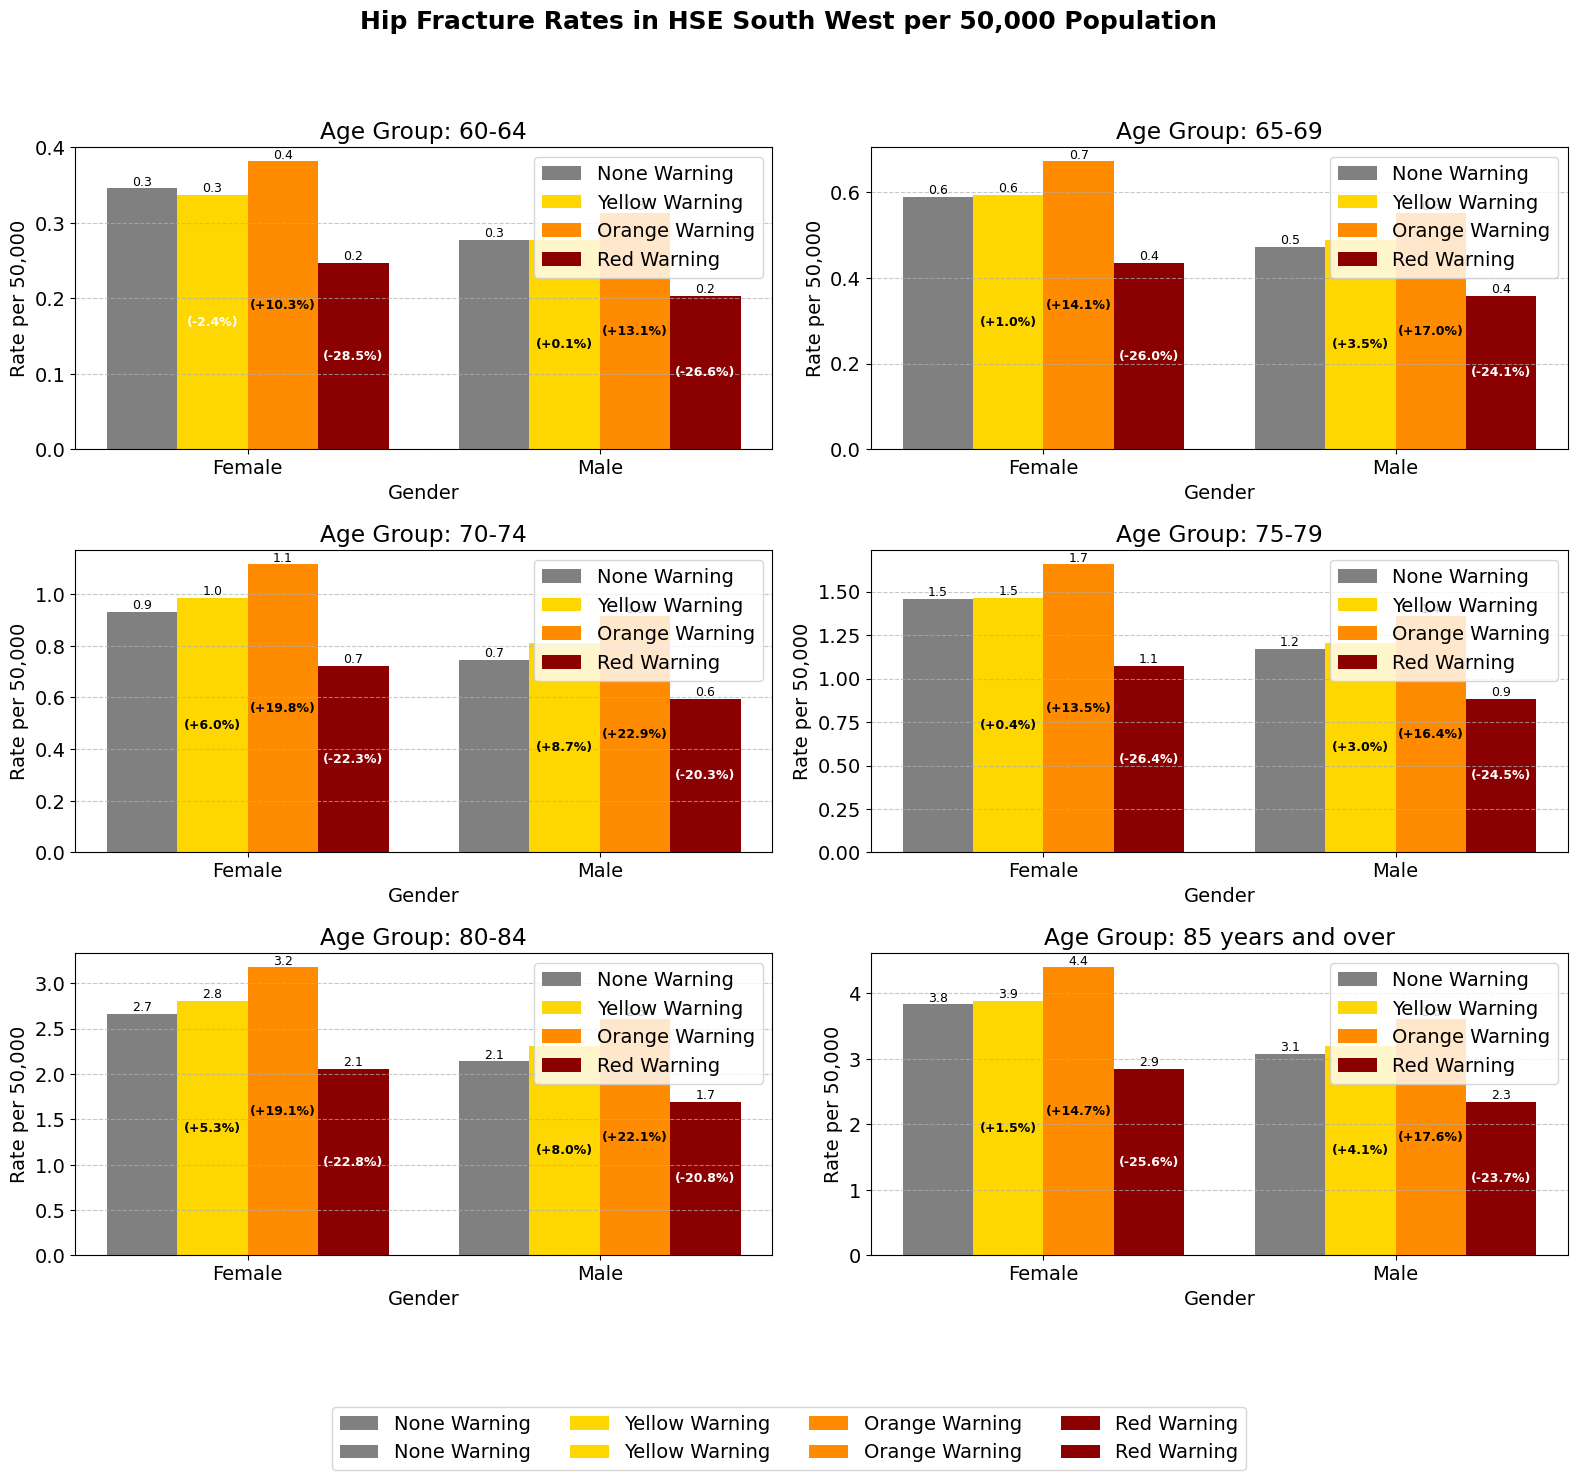

Plot saved to: /home/paulharford/college/project/ul_project_Msc_AI/analysis/processed_data/visual_outputs/WEATHERED


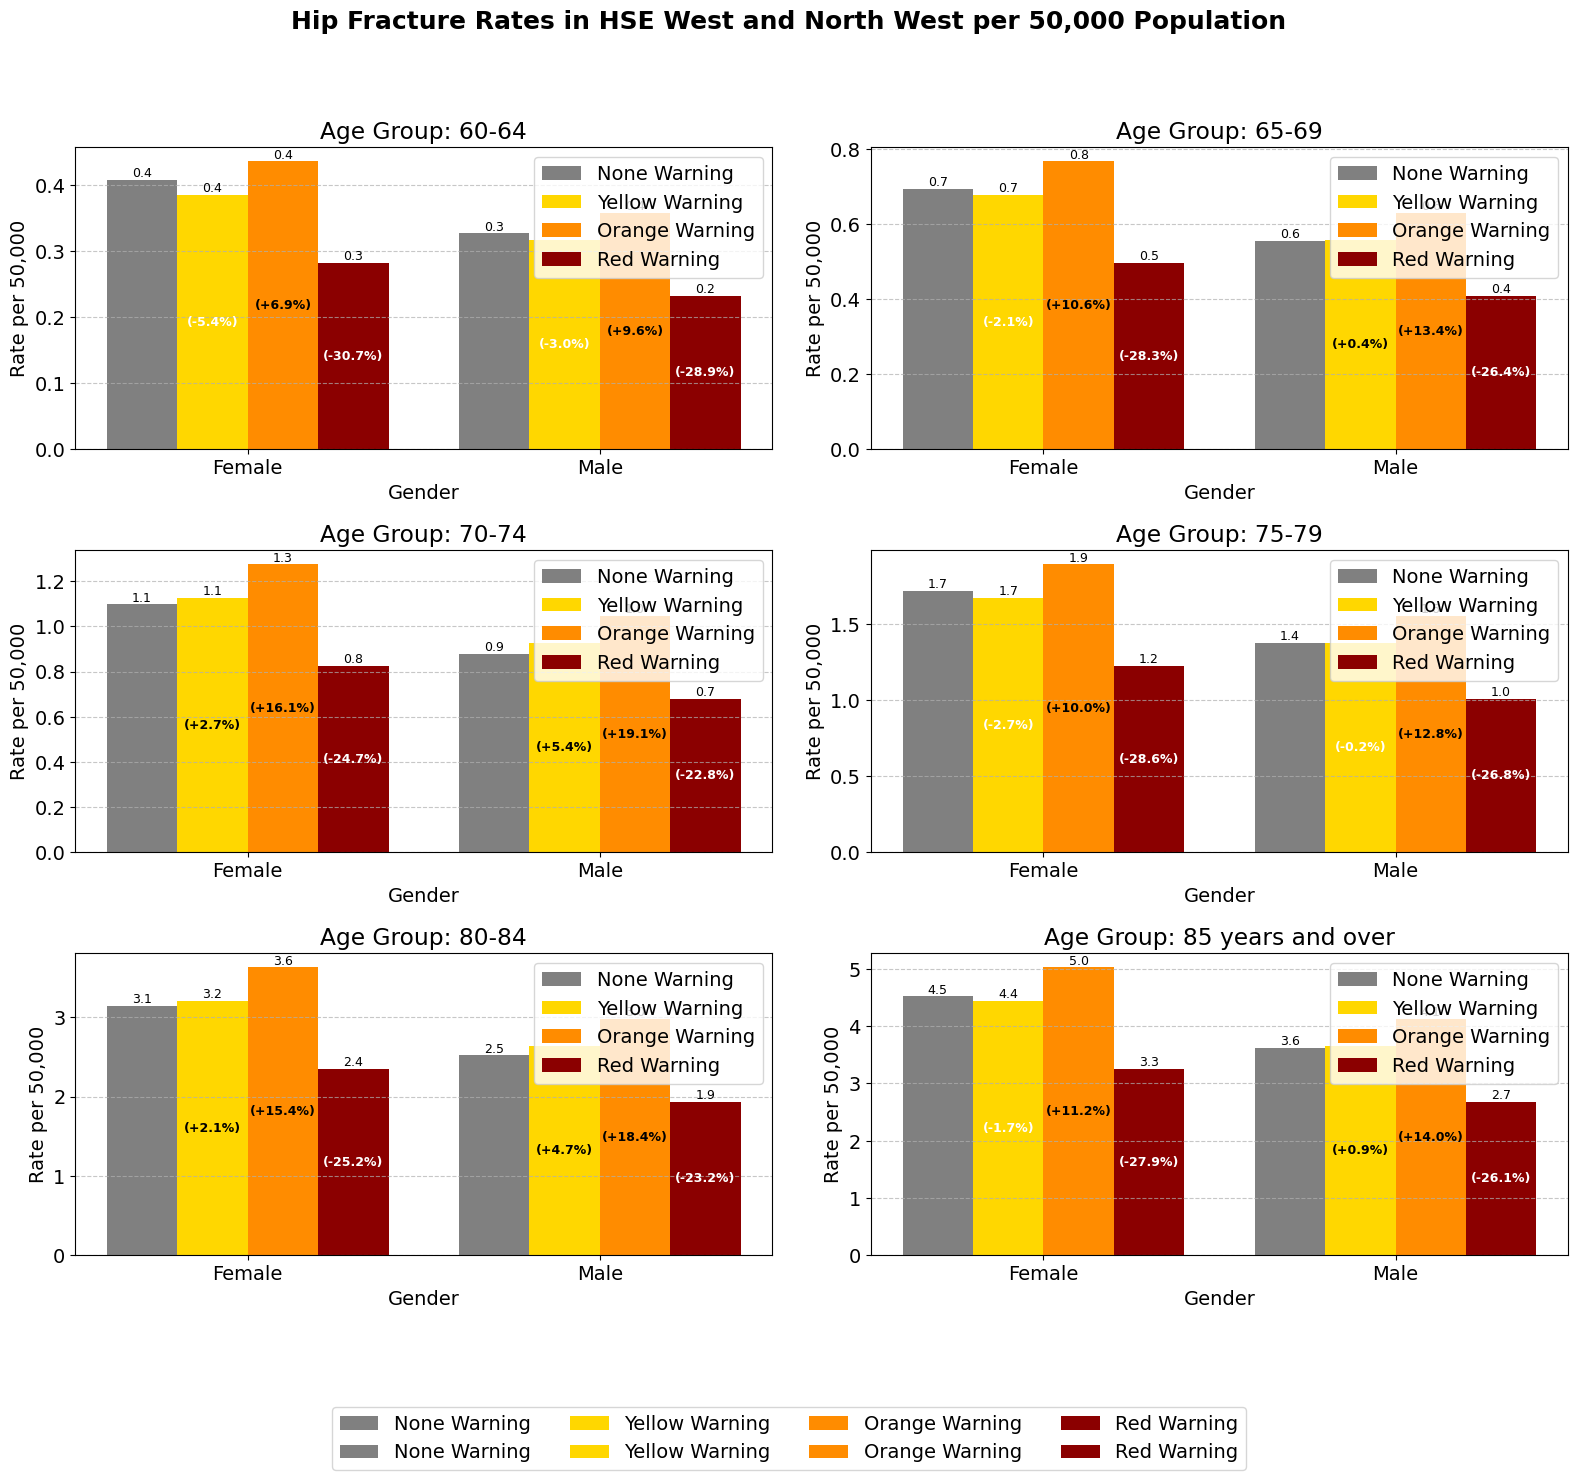

In [100]:
rates_df = calculate_hip_fracture_rates(
    model=quasi_poisson_results,                # Your fitted model
    df=df_final_expanded,       # Your dataset
    reference_population=50000  # Population reference (can adjust as needed)
)

# 3. Calculate percentage changes from baseline for each combination
pct_changes = calculate_percentage_changes(
    rates_df=rates_df,
    reference_population=50000  # Same value as used above
)

# 4. Plot the results by region
plot_rates_by_region(
    rates_df=rates_df,
    pct_changes=pct_changes,
    reference_population=50000,
    save_path="/home/paulharford/college/project/ul_project_Msc_AI/analysis/processed_data/visual_outputs/WEATHERED"  # Optional: specify a directory to save plots
)